# Capstone Project - Stroke Predictor in the Context of Insurtech

Bei einem Schlaganfall handelt es sich um ein neurologisches Defizit, welches aus kardiovaskulären Gründen einen akuten fokalen Schaden am zentralen Nervensystem verursacht und dadurch oft zu fatalen Folgen führt (American Stroke Association, 2013). Laut Tsao et al. (2022) erleiden circa 800'000 Menschen in der USA jährlich einen Schlaganfall, wobei 87% aller Schlaganfälle durch eine Blockade des Blutflusses hervorgerufen werden. Des Weiteren erachtet das Paper Schlaganfälle als eine der häufigsten Ursachen für Behinderungen und Frühmortalität in der USA. 

Jedoch muss betont werden, dass diese Befunde nicht nur für die USA gelten, sondern global übertragbar sind. So, dokumentiert auch die Schweiz beispielsweise jährlich 16'000 Schlaganfälle, was Schlaganfälle zu einer der wichtigsten Todesursachen in der Schweiz macht (Schweizer Neurologie Gesellschaft, 2022). Wie unten aufgeführt hat sich die Zahl an Schlaganfälle in den letzten 30 Jahren verdoppelt und tritt vermehrt auch bei Menschen unter 70 auf.

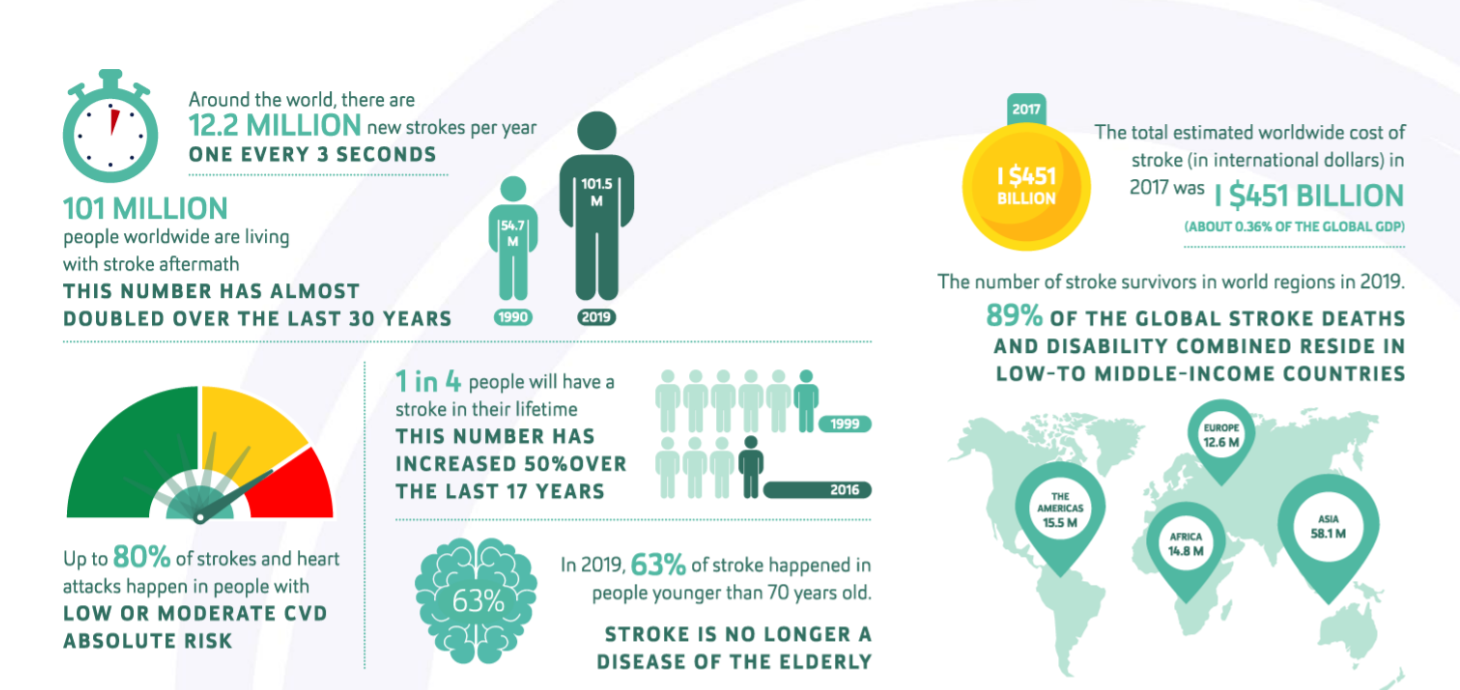
Source: WSO (2022), Owolabi et al. (2021) 

Um Schlaganfälle zu verhindern, ist neben einem gesunden Lebensstill auch die Früherkennung von Risken zentral. Dies erscheint vor allem im Kontext von Versicherungen äusserst relevant, da diese sozial und monetär am Wohlbefinden ihrer Kunden interessiert sind. Einerseits trägt die Früherkennung von Risiken zur Schlaganfallprävention von Kunden bei, andererseits können Versicherung so ihr Risk Management mit effizienteren Prämienberechnungen und Kundenselektionen optimieren. Die hohen Kosten, die im Fall eines Schlaganfalls auf eine Versicherung zukommen werden von Kolominsky-Rabas et al. (2006) verdeutlicht, welche lebenslange Therapie-Kosten nach einem Schlaganfall in Deutschland auf durchschnittliche 43'129 Euro schätzen. 

Zusammenfassend kann gesagt werden, dass Schlaganfällen eine hohe globale Wichtigkeit zukommen und insbesondere für Versicherungen negative Implikationen haben können. Dieses Capstone Projekt versucht basierend auf Gesundheitsdaten einen Stroke-Predictor zu entwickeln, damit Versicherungen Risikopersonen frühzeitig identifizieren und folglich das operative Risiko und die negativen Konsequenzen minimiert werden können. Aufgrund der hohen Kosten für die Versicherung im Falle eines Schlaganfalls konzentriert sich dieses Projekt auf eine Optimierung des Recalls, um unentdeckte Schlaganfälle zu minimieren. Hierbei muss angemerkt werden, dass in der Realität genau ausgerechnet werden müsste, in welchem Bereich der optimale Trade-off zwischen dem Profit durch die Erhöhung des Recalls und der Verlust durch den Rückgang der Precision liegt.
<br>

## 0) Preparation

In [666]:
#Import Packages:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [667]:
#Define Paths:
path1 = "C:/Users/41796/Desktop/Data Analytics/Capstone/"
path2 = "/Users/noa/Desktop/Capstone Code/"
#path3 = "//"

## 1) Review of Dataset

### In einem ersten Schritt wird das Dataset eingelesen und kurz untersucht.

In [668]:
#stroke_df = pd.read_csv(path1 + "healthcare.csv")
stroke_df = pd.read_csv(path2 + "healthcare-dataset-stroke-data.csv")
#stroke_df = pd.read_csv(path3 + "healthcare.csv")

In [669]:
#List the first 10 entries:
stroke_df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [670]:
#Get information about the dataset
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### Das Dataset besteht aus 12 Spalten mit 5110 Zeilen. Da wir vorhersagen wollen, ob ein (potentieller) Kunde einen Schlaganfall erleidet oder nicht, ist die Spalte "stroke" die Ziel-Variable. Ausserdem fällt auf, dass die "bmi" Spalte 201 (3.93%) Missing Values beinhaltet, welche wir später noch imputieren müssen.

In [671]:
print(stroke_df['gender'].value_counts())

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


In [673]:
print(stroke_df['work_type'].value_counts())

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


In [674]:
print(stroke_df['smoking_status'].value_counts())

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


In [675]:
stroke_df.drop_duplicates() #still 5110 entries (no duplicates)
len(stroke_df) 

5110

### Es gibt deutlich mehr Einträge von weiblichen Personen als von männlichen. Zudem haben wir noch 1544 Werte "unknown" in der Spalte "smoking status", was nicht wie bei "bmi" mit einer Imputation einfach behoben werden kann. Obwohl dies für die anschliessende Analyse etwas problematisch wirkt, lassen wir es vorerst unverändert. Dies aus der Überlegung, dass die unbekannten Werte wahrscheinlich einer ähnlichen Verteilung folgen wie die bekannten Werte und somit keine grossen negativen Auswirkungen auf das Modell haben sollten. Des Weiteren gibt es keine Indizien für doppelte Werte im Datensatz.

In [676]:
#Drop the index-column and get dummies
stroke_df = stroke_df.drop("id", axis = 1)
stroke_df = pd.get_dummies(stroke_df, drop_first = True)
stroke_df.tail()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
5105,80.0,1,0,83.75,NaN,0,0,0,1,0,1,0,0,1,0,1,0
5106,81.0,0,0,125.20,40.0,0,0,0,1,0,0,1,0,1,0,1,0
5107,35.0,0,0,82.99,30.6,0,0,0,1,0,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.6,0,1,0,1,0,1,0,0,0,1,0,0
5109,44.0,0,0,85.28,26.2,0,0,0,1,0,0,0,0,1,0,0,0


In [677]:
#Determine the amount of columns after creating dummy variables
num = stroke_df.shape[1]
print("The number of columns after creating dummy variables and deleting the index is:", num)

The number of columns after creating dummy variables and deleting the index is: 17


In [678]:
#Show the correlations between the columns
stroke_df_corr = stroke_df.corr()  #High correlations may interfere with our results
stroke_df_corr.style.background_gradient(cmap='coolwarm')

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
age,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257,-0.027623,-0.010659,0.679125,-0.078653,0.116534,0.327989,-0.634215,0.014180,0.236897,0.119307,0.073133
hypertension,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904,0.021275,-0.004597,0.164243,-0.021608,-0.005413,0.115442,-0.129506,-0.007913,0.058853,0.065063,0.031240
heart_disease,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914,0.085717,-0.003343,0.114644,-0.015712,0.000027,0.086760,-0.091634,0.003092,0.066804,-0.021856,0.044049
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945,0.054580,0.011489,0.155068,-0.014675,0.016588,0.062694,-0.102250,-0.004946,0.068111,0.023885,0.017646
bmi,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374,-0.026020,-0.011802,0.341695,-0.028602,0.208029,0.072701,-0.448674,-0.000122,0.107031,0.107964,0.088324
stroke,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000,0.009117,-0.003166,0.108340,-0.014882,0.011888,0.062168,-0.083869,0.015458,0.064556,-0.004129,0.008939
gender_Male,-0.027623,0.021275,0.085717,0.054580,-0.026020,0.009117,1.000000,-0.011757,-0.029936,0.011496,-0.032639,-0.025971,0.089283,-0.005937,0.042738,-0.098813,0.011477
gender_Other,-0.010659,-0.004597,-0.003343,0.011489,-0.011802,-0.003166,-0.011757,1.000000,-0.019327,-0.000920,0.012092,-0.006112,-0.005514,-0.014217,0.030568,-0.010728,-0.005978
ever_married_Yes,0.679125,0.164243,0.114644,0.155068,0.341695,0.108340,-0.029936,-0.019327,1.000000,-0.090838,0.153830,0.192716,-0.544441,0.006261,0.171256,0.102845,0.105226
work_type_Never_worked,-0.078653,-0.021608,-0.015712,-0.014675,-0.028602,-0.014882,0.011496,-0.000920,-0.090838,1.000000,-0.076081,-0.028728,-0.025915,0.022859,-0.030095,0.036238,-0.028099


### Die Analyse des Datasets und das Erstellen von Dummy-Variabeln hat dazu geführt, dass das Hindernis von nicht quatifzierbaren Einträgen überwunden werden konnte und zentrale Problematiken aufgedeckt werden konnten. So existieren beispielsweise "unknown"-Einträge in der Spalte des Raucher-Status, welche eigentlich nichts über den Kunden aussagen. Des Weiteren lässt sich aus obenstehender Abbildung ablesen, dass einzelne Variablen hohe Korrelationen aufweisen. Vor allem das Alter korreliert positiv mit vielen Variablen wie Heiratstatus (0.68), BMI (0.33), der Arbeitsart "Selbstanstellung" (0.33) und auch dem Schlaganfall (0.25). Zudem korreliert das Alter naheliegenderweise stark negativ mit der Arbeitsart "Kinder". Sollte sich dies im Verlauf des Projekts als Problem herausstellen, müsste man dies entsprechend anpassen. Des Weiteren zeigte sich auch das Problem der "missing values" in der Spalte "BMI". Diese Thematik soll nun anhand von einer geeigneten Imputation bearbeitet werden. 

## 2) Creation of Training and Testing Data & Imputation of Missing Values

In [679]:
#Import model functions:
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer

In [680]:
#Define X and y:
X = stroke_df.drop("stroke", axis = 1)
y = stroke_df["stroke"]

In [681]:
#Define training and testing data and set a random_state for reproduceability:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=3)

In [682]:
#Define columns for imputation:
cols = list(stroke_df.columns)
cols.remove("stroke")

In [683]:
#Value imputation part 1
imputer = KNNImputer(n_neighbors=5)  #set the amount of nearest neighbors to 5
imputer.fit(X_train)  #fit the imputer on the training data
X_train_imputed = imputer.transform(X_train)  #transform the training data
X_train_imputed = pd.DataFrame(X_train_imputed, columns=cols, index = X_train.index)  #create the final dataframe with the same columns
X_train_imputed

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
3160,17.00,0.0,0.0,88.65,30.3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2730,27.00,0.0,0.0,110.87,29.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1861,45.00,0.0,0.0,115.23,28.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1825,48.00,0.0,0.0,84.56,41.8,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
510,46.00,0.0,0.0,78.75,37.8,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,54.00,0.0,0.0,111.41,31.1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
968,55.00,0.0,0.0,112.47,32.8,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1667,40.00,0.0,0.0,191.48,27.9,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3321,1.88,0.0,0.0,81.42,13.5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [684]:
#Value imputation part 2
imputer = KNNImputer(n_neighbors=5)  #set the amount of nearest neighbors to 5
imputer.fit(X_test)  #fit the imputer on the training data
X_test_imputed = imputer.transform(X_test)  #transform the training data
X_test_imputed = pd.DataFrame(X_test_imputed, columns = cols, index = X_test.index)  #create the final dataframe with the same columns

In [685]:
X_train_imputed["bmi"].isnull().mean() #imputation was successful

0.0

In [686]:
X_test_imputed["bmi"].isnull().mean() #imputation was successful

0.0

### Der Datensatz unterliegt einem 70:30 Split und wurde durch den random_state=3 reproduzierbar gemacht. Es ist wichtig, dass man hier die Value Imputation nach dem Split macht und auf 0% Missing Values kommt. Wir haben uns hier für das etwas kompliziertere Scikit Learn Verfahren entschieden, da es die Regressions-Analyse weniger als andere Verfahren verzerrt.

In [687]:
#Define Lift:
def calculate_lift(y_val, y_pred):
    from pandas import DataFrame
    from numpy import ceil, arange
    
    #Define an auxiliar dataframe to plot the curve
    aux_lift = DataFrame()
    aux_lift['true'] = y_val
    aux_lift['predicted'] = y_pred
    aux_lift.sort_values('predicted', ascending=False, inplace=True)
    
    #Create the values that will go into the X axis of our plot
    xval = arange(0.01,1.01,0.01) #create sequence of values from 0.01 to 1.00 in steps of 0.01
    lift = [] #create empty list for storing lift values
    
    #Calculate the total ratio of true events in the data
    ratio_true_events_total = aux_lift['true'].sum() / len(aux_lift)
    
    #Calculate lift for each x value its correspondent y value
    for x in xval:
        index_xval = int(ceil(x*len(aux_lift))) #get index at specific value of x
        dataframe_xval = aux_lift.iloc[:index_xval,:]   #subset dataframe from 0 to index_val
        lift_xval = dataframe_xval['true'].sum()/len(dataframe_xval) #calculate lift for subset
        lift.append(lift_xval / ratio_true_events_total) #store results
    
    return (DataFrame({"Lift":lift, "ProportionSample":xval}))

In [688]:
#Check Dimensions:
print(X_train_imputed.shape)
print(y_train.shape)
print(X_test_imputed.shape)
print(y_test.shape)

(3577, 16)
(3577,)
(1533, 16)
(1533,)


### Auch die Dimensionen scheinen nach dem Split und der Imputation übereinzustimmen. Folglich können wir uns nun der eigentlichen Analyse widmen.  <br> 

## 3) Analysis with Classification Trees

### Eine der effektivsten Methoden, um Klassifikationsprobleme zu lösen ist zweifellos der Classification Tree, deshalb ergibt es Sinn zuerst einen Blick auf die verschiedenen Tree Verfahren zu werfen.

## 3.1A) Basic Tree:

In [689]:
#Import model functions:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [690]:
#Instantiate basic DecisionTreeClassifier Model:
Basic_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 2)

In [691]:
#Fit model to training data:
Basic_tree.fit(X_train_imputed, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

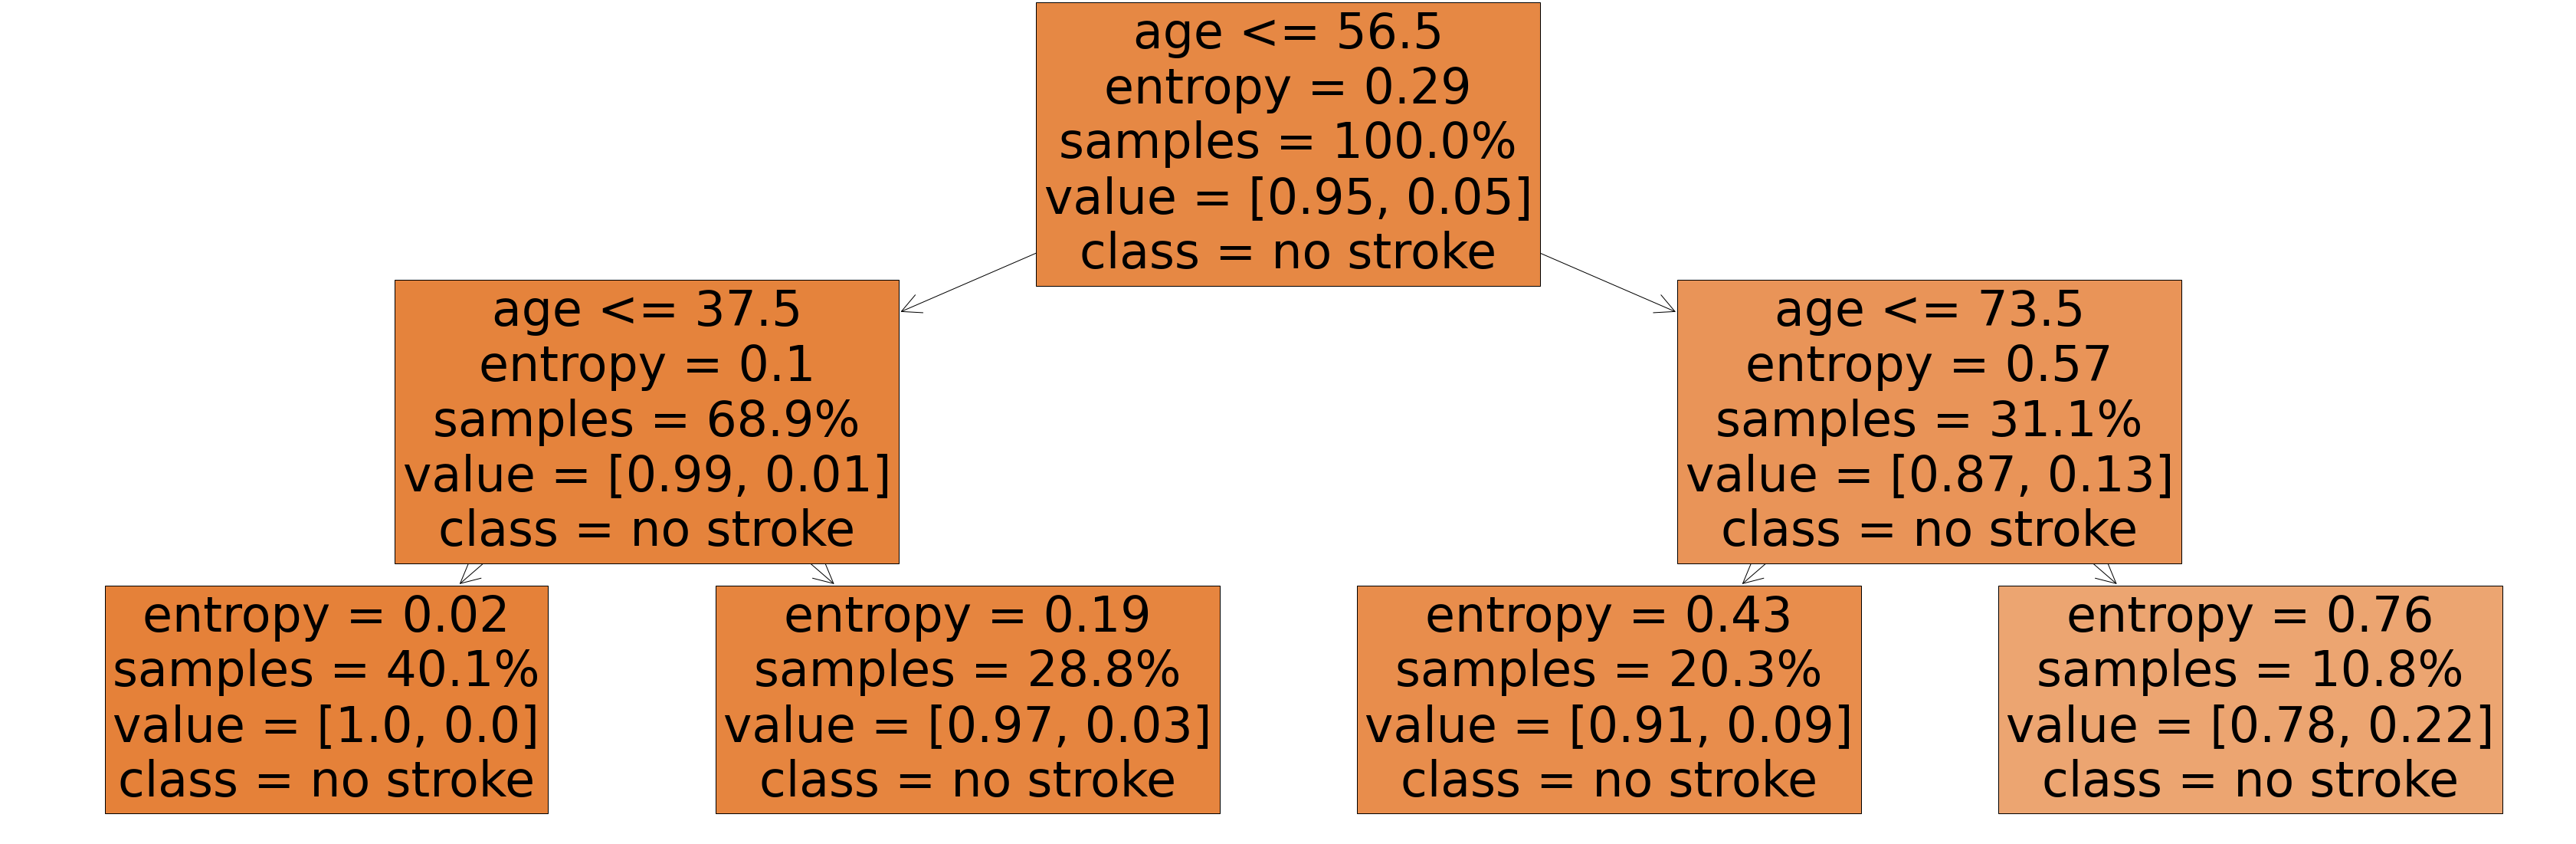

In [692]:
#Plot results:
def plot_tree_classification(treemodel, X):
    from sklearn import tree
    import matplotlib.pyplot as plt
    
    fig = plt.figure(figsize=(60,20))
    _ = tree.plot_tree(treemodel,filled=True,
                       class_names=['no stroke','stroke'],
                       feature_names = X.columns,
                       proportion=True,precision=2)

plot_tree_classification(Basic_tree, X_train_imputed)

In [693]:
#Evaluate results:
y_preds_class1A = Basic_tree.predict(X_train_imputed) #predict strokes on the training data
print(classification_report(y_train, y_preds_class1A))
warnings.filterwarnings('ignore') #surpress divided by zero error warnings

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3395
           1       0.00      0.00      0.00       182

    accuracy                           0.95      3577
   macro avg       0.47      0.50      0.49      3577
weighted avg       0.90      0.95      0.92      3577



### Durch die Analyse des Modells auf den Trainingsdaten kann anhand des Unterschieds zu den Testdaten die Höhe des Overfittings ausgemacht werden.

In [694]:
y_preds_class1B = Basic_tree.predict(X_test_imputed)  #predict strokes on the test data
print(classification_report(y_test, y_preds_class1B))
warnings.filterwarnings('ignore')  #surpresses divided by zero error warnings

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1466
           1       0.00      0.00      0.00        67

    accuracy                           0.96      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.91      0.96      0.93      1533



In [695]:
#Area Under Curve (AUC):
A1 = roc_auc_score(y_train, y_preds_class1A)  #calculate the area under the curve for the training data
B1 = roc_auc_score(y_test, y_preds_class1B)  #calculate the area under the curve for the test data
print("AUC of training data is:", A1, "|", "AUC of testing data is:", B1)

AUC of training data is: 0.5 | AUC of testing data is: 0.5


### Der Basic Decision Tree erweist sich als enttäuschend und ist unbrauchbar bezüglich der Precision (0.0) und des Recalls (0.0). Auch die Fläche unter der Kurve (AUC) von minimalen 0.5 zeigt, dass das Modell noch keinen Mehrwert generiert. Die Analyse zeigt, dass das Modell alle Werte als "no stroke" klassifiziert. Es stellt sich nun die Frage, ob wir ein brauchbares Modell erzeugen können, indem wir den Decision Tree kreuzvalidieren.

## 3.1B) Cross Validated Tree:

In [696]:
#Instantiate Cross Validated Model:
parameters = {"criterion":["gini","entropy"],
              "max_depth":[3, 5, 7, 10, 20, 30, 40, 60, 70], 
              "min_samples_split":[2,3,4,5,30,40, 50, 60]}

CV_tree = GridSearchCV(DecisionTreeClassifier(random_state=3),parameters, cv=5)

In [697]:
#Fit model to training data:
CV_tree.fit(X_train_imputed, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, 20, 30, 40, 60, 70],
                         'min_samples_split': [2, 3, 4, 5, 30, 40, 50, 60]})

In [698]:
#Evaluate results:
y_preds_class2A = CV_tree.predict(X_train_imputed)  #predict strokes on the training data
print(classification_report(y_train, y_preds_class2A))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3395
           1       1.00      0.02      0.04       182

    accuracy                           0.95      3577
   macro avg       0.98      0.51      0.51      3577
weighted avg       0.95      0.95      0.93      3577



In [699]:
#Predict strokes on the test data:
y_preds_class2B = CV_tree.predict(X_test_imputed)
print(classification_report(y_test, y_preds_class2B))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1466
           1       0.00      0.00      0.00        67

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.91      0.95      0.93      1533



In [700]:
#Area Under Curve (AUC):
A2 = roc_auc_score(y_train, y_preds_class2A)  #calculate the area under the curve for the training data
B2 = roc_auc_score(y_test, y_preds_class2B)  #calculate the area under the curve for the test data
print("AUC of training data is:", A2, "|", "AUC of testing data is:", B2)

AUC of training data is: 0.510989010989011 | AUC of testing data is: 0.49897680763983626


### Wie zuvor erhalten wir eine sehr hohe Accuracy von 0.95 auf den Testdaten, was daran liegt, dass auch hier trotz Crossvalidation alle Werte als no-Strokes klassifiziert wurden. Auch die AUC mit 0.5 ist sehr tief und hat sich kaum verändert. In diesem Fall ist das Modell sogar schwacher als ein Random Classifier. Dies könnte möglicherweise daran liegen, dass wir mit einem unausgeglichenen Datensatz konfrontiert sind.

In [701]:
print(stroke_df['stroke'].value_counts())
print(249/5110)

0    4861
1     249
Name: stroke, dtype: int64
0.0487279843444227


### Tatsächlich enthält das Dataset nur 249 Instanzen von stroke=1 im Vergleich zu 4861 stroke=0, was das Trainieren der Decision Trees erschwert und in diesem Fall zu unbrauchbaren Modellen führt. Nichtsdestotrotz versuchen wir als nächstes noch einen Random Forest und ein Boosted Tree zu trainieren, bevor wir in der Literatur nach einer Lösung suchen.

## 3.1C) Random Forest:

In [703]:
#Import model function:
from sklearn.ensemble import RandomForestClassifier

In [704]:
#Instantiate Random Forest model:
parameters = {"criterion":["gini","entropy"],
              "max_depth":[5, 7, 10, 20, 30, 40, 50], 
              "min_samples_split":[3, 4, 5, 30, 40, 50]}

CV_Forest = GridSearchCV(RandomForestClassifier(random_state=3),parameters, cv=5)

In [705]:
#Fit model to training data:
CV_Forest.fit(X_train_imputed, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 10, 20, 30, 40, 50],
                         'min_samples_split': [3, 4, 5, 30, 40, 50]})

In [706]:
#Evaluate results:
y_preds_class3A = CV_Forest.predict(X_train_imputed)  #predict strokes on the training data
print(classification_report(y_train, y_preds_class3A))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3395
           1       1.00      0.01      0.01       182

    accuracy                           0.95      3577
   macro avg       0.97      0.50      0.49      3577
weighted avg       0.95      0.95      0.93      3577



In [708]:
y_preds_class3B = CV_Forest.predict(X_test_imputed)  #predict strokes on the test data
print(classification_report(y_test, y_preds_class3B))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1466
           1       0.00      0.00      0.00        67

    accuracy                           0.96      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.91      0.96      0.93      1533



In [709]:
#Area Under Curve (AUC):
A3 = roc_auc_score(y_train, y_preds_class3A)  #calculate the area under the curve for the training data
B3 = roc_auc_score(y_test, y_preds_class3B)  #calculate the area under the curve for the test data
print("AUC of training data is:", A3, "|", "AUC of testing data is:", B3)

AUC of training data is: 0.5027472527472527 | AUC of testing data is: 0.5


### Man kommt zu ähnlichen Ergebnissen wie beim Basic Decision Tree. Das Modell sagt nur "no stroke" voraus, was an der Precision von 100% ersichtlich ist. Auch ist der AUC auf den Test Daten ist nur 0.5, was als sehr schlecht zu bewerten ist. Somit kann man mit diesem Modell praktisch nichts anfangen.

## 3.1D) Boosted Tree:

In [710]:
#Import model functions:
import xgboost as xgb
from xgboost import XGBClassifier

In [711]:
#Instantiate Boosted Tree model:
parameters = {"n_estimators":[400, 500], 
               "subsample" : [0.5, 0.6, 0.7, 0.8],
              "learning_rate":[0.05]}

CV_Boosted = GridSearchCV(XGBClassifier(random_state=3),parameters, cv=5)

In [712]:
#Fit model to training data:
CV_Boosted.fit(X_train_imputed, y_train)
CV_Boosted.best_params_

{'learning_rate': 0.05, 'n_estimators': 400, 'subsample': 0.7}

In [713]:
#Evaluate results:
y_preds_class4A = CV_Boosted.predict(X_train_imputed)  #predict strokes on the training data
print(classification_report(y_train, y_preds_class4A))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3395
           1       1.00      0.84      0.91       182

    accuracy                           0.99      3577
   macro avg       1.00      0.92      0.95      3577
weighted avg       0.99      0.99      0.99      3577



In [714]:
y_preds_class4B = CV_Boosted.predict(X_test_imputed)  #predict strokes on the test data
print(classification_report(y_test, y_preds_class4B))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1466
           1       0.14      0.03      0.05        67

    accuracy                           0.95      1533
   macro avg       0.55      0.51      0.51      1533
weighted avg       0.92      0.95      0.93      1533



In [715]:
#Area Under Curve (AUC):
A4 = roc_auc_score(y_train, y_preds_class4A)  #calculate the area under the curve for the training data
B4 = roc_auc_score(y_test, y_preds_class4B)  #calculate the area under the curve for the test data
print("AUC of training data is:", A4, "|", "AUC of testing data is:", B4)

AUC of training data is: 0.9175824175824177 | AUC of testing data is: 0.5108326036936736


Summary of Results:

|Model|Precision [1]|Recall [1]|Accuracy|AUC|Usability|
|--|--|--|--|--|--|
|Basic Tree|0|0|0.96|0.5|No!|
|CV Tree|0|0|0.95|0.5|No!|
|Random Forest|0|0|0.96|0.5|No!|
|Boosted Tree|0.14|0.03|0.95|0.52|No|

### Die Analyse zeigt, dass der unausgeglichene Datensatz zu extrem schlechten Modellen führt. Dies ist zum Beispiel am tiefen AUC ersichtlich, denn ein Wert von 0.5 bedeutet, dass das Model nicht zwischen den beiden Klassen unterscheiden kann. Obwohl der Boosted Tree ebenfalls praktisch unbrauchbar ist, hat er besser performt als der Crossvalidated Tree, Basic Tree und der Random Forest, welche praktisch nur "no Strokes" vorhersagen. Anzumerken ist noch, dass der Boosted Tree sehr gut auf den Daten performt, auf welchen er bereits trainiert ist. <br>

## 3.2) Rebalancing of Dataset with Oversampling/Undersampling

### Abschnitt 3.1 hat exemplarisch die Tücken von imbalanced Datasets im Kontext von binären Klassifikationsproblemen bei Decision Trees aufgezeigt. In diesem Abschnitt versuchen wir nun, dieses Problem mit einem resampelten Trainingsdatenset zu lösen und kritisch zu besprechen. Dieser Lösungsansatz scheint in der Literatur weitverbreitet zu sein und ist so beispielsweise in Wong & Kamel (2011) vorzufinden, welche Oversampling of the small Class und Undersampling of the prevalent Class als mögliche Lösungen auf der Datenebene angeben (S. 700). Jedoch muss beachtet werden, dass wir nur 249 (5%) stroke=1 Instanzen haben und wir dadurch nur ein sehr kleines Trainingsdatenset erstellen können, was wiederum andere Probleme nach sich zieht. Man könnte versuchen ein Trainingsdatenset zu erstellen mit 400 Instanzen bestehend aus beiden Klassen im gleichen Verhältnis (200:200) und einem Testdatenset bestehend aus 4710 im Verhältnis (49:4661).

In [716]:
#Create new datasets:
df0 = stroke_df.loc[(stroke_df["stroke"] == 0)]
df1 = stroke_df.loc[(stroke_df["stroke"] == 1)]
df1.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,NaN,1,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0


In [717]:
len(df0), len(df1) #dimensions are correct!

(4861, 249)

In [718]:
#Create a new training dataframe and a testing dataframe
df0A = df0[0:200]
df0B = df0[200:4861]
df1A = df1[0:200]
df1B = df1[200:249]
mini_train_df = pd.concat([df0A,df1A], axis=0)
mini_test_df = pd.concat([df0B,df1B], axis=0)
mini_train_df.shape, mini_test_df.shape #success as 400 + 4710 = 5110

((400, 17), (4710, 17))

In [719]:
#Define X and y
y_train_mini = mini_train_df["stroke"]
X_train_mini = mini_train_df.drop("stroke", axis=1)
y_test_mini = mini_test_df["stroke"]
X_test_mini = mini_test_df.drop("stroke", axis=1)

In [720]:
#Imputation A as done before:
imputer = KNNImputer(n_neighbors=5)  #Takes the 5 nearest neighbors for imputation
imputer.fit(X_train_mini)
X_train_imputed_mini = imputer.transform(X_train_mini)
X_train_imputed_mini = pd.DataFrame(X_train_imputed_mini, columns=cols, index = X_train_mini.index)
X_train_imputed_mini["bmi"].isnull().mean() #successful imputation

0.0

In [721]:
#Imputation B:
imputer = KNNImputer(n_neighbors=5)  #Takes the 5 nearest neighbors for imputation
imputer.fit(X_test_mini)
X_test_imputed_mini = imputer.transform(X_test_mini)
X_test_imputed_mini = pd.DataFrame(X_test_imputed_mini, columns=cols, index = X_test_mini.index)
X_test_imputed_mini["bmi"].isnull().mean() #successful imputation

0.0

## 3.2A) Decision Tree:

In [722]:
#Instantiate Basic Model:
Basic_tree2 = DecisionTreeClassifier(criterion="entropy", max_depth = 2)

In [723]:
#Fit model to training data:
Basic_tree2.fit(X_train_imputed_mini, y_train_mini)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

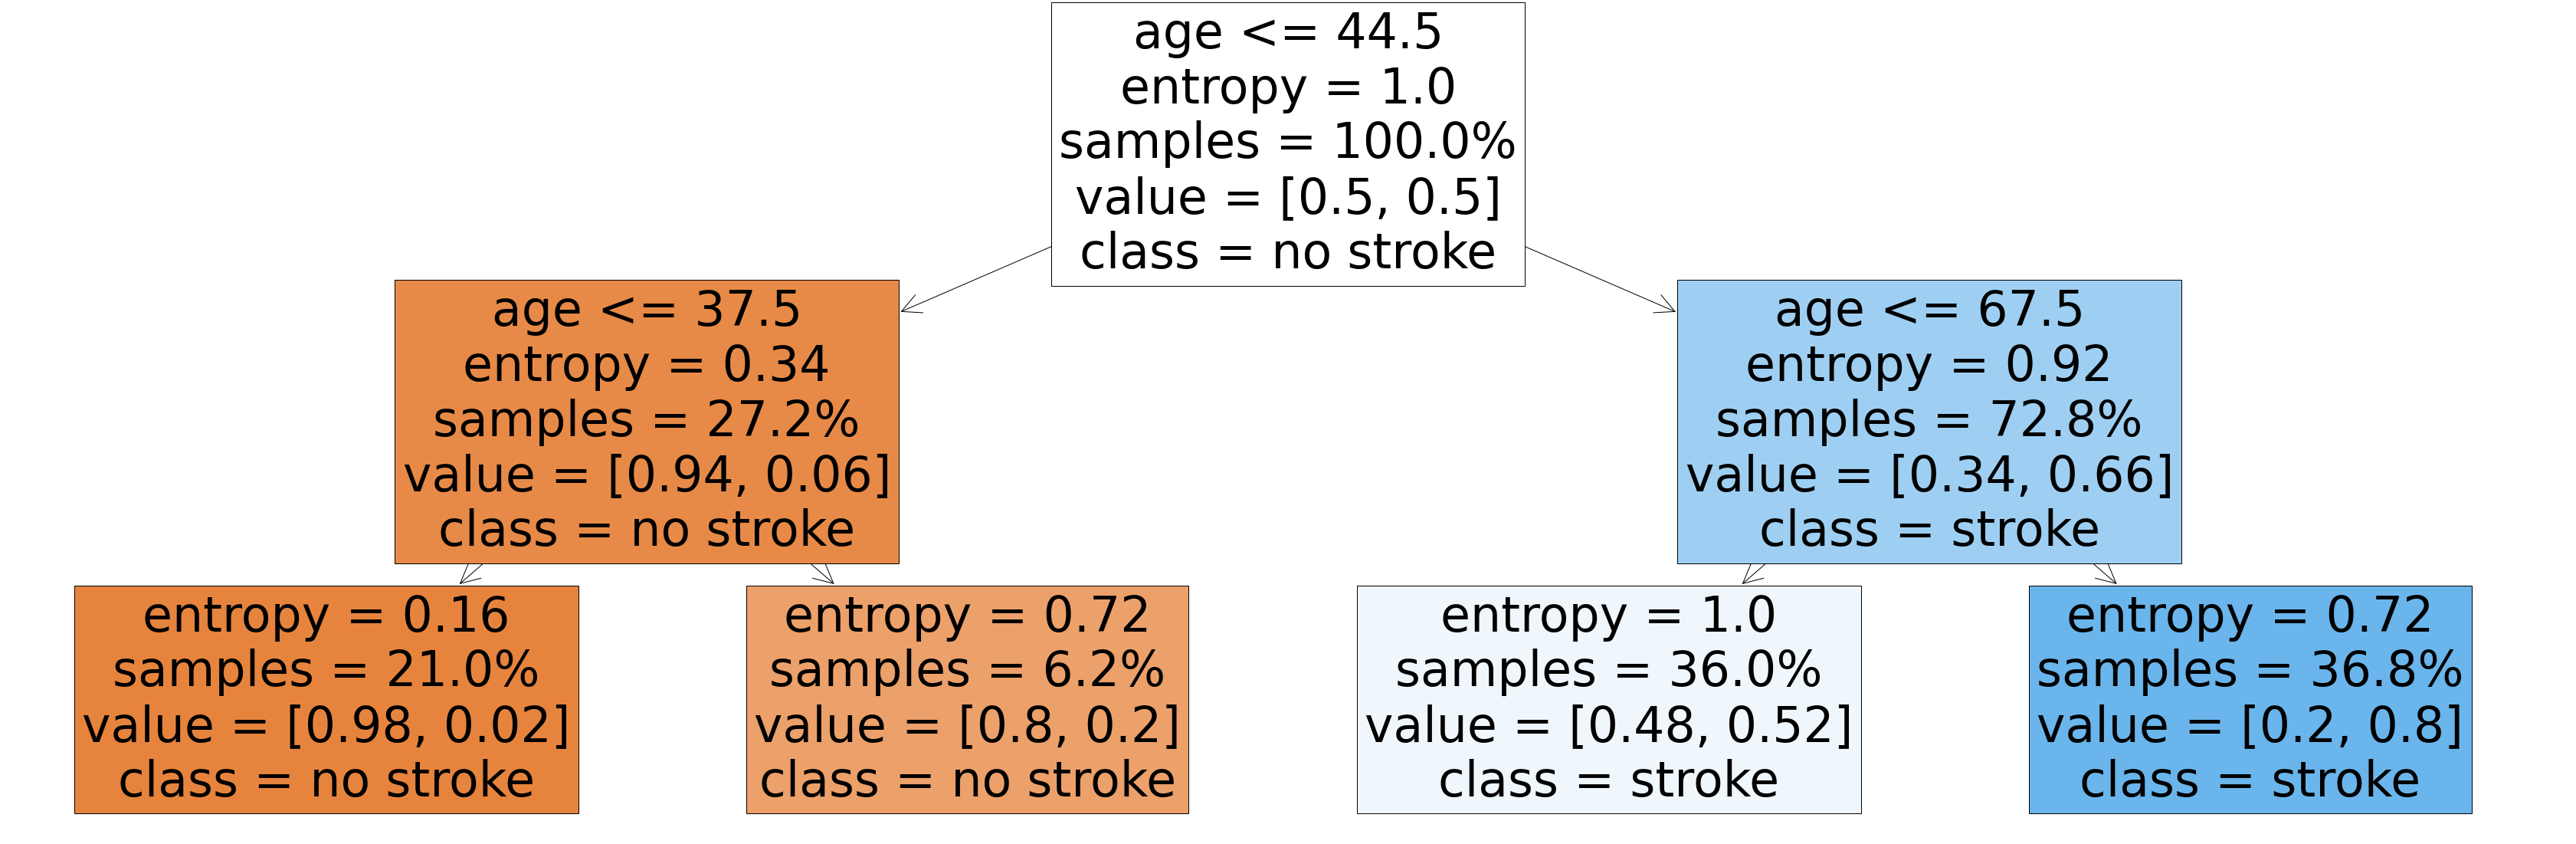

In [724]:
#Plot results:
def plot_tree_classification(treemodel, X):
    from sklearn import tree
    import matplotlib.pyplot as plt
    
    fig = plt.figure(figsize=(60,20))
    _ = tree.plot_tree(treemodel,filled=True,
                       class_names=['no stroke','stroke'],
                       feature_names = X.columns,
                       proportion=True,precision=2)

plot_tree_classification(Basic_tree2, X_train_imputed_mini)

In [725]:
#Evaluate results:
y_preds_class1A_ = Basic_tree2.predict(X_train_imputed_mini)  #predict strokes on the training data
print(classification_report(y_train_mini, y_preds_class1A_))

              precision    recall  f1-score   support

           0       0.94      0.51      0.66       200
           1       0.66      0.96      0.79       200

    accuracy                           0.74       400
   macro avg       0.80      0.74      0.72       400
weighted avg       0.80      0.74      0.72       400



In [726]:
y_preds_class1B_ = Basic_tree2.predict(X_test_imputed_mini)  #predict strokes on the test data
print(classification_report(y_test_mini, y_preds_class1B_))

              precision    recall  f1-score   support

           0       1.00      0.52      0.68      4661
           1       0.02      0.94      0.04        49

    accuracy                           0.52      4710
   macro avg       0.51      0.73      0.36      4710
weighted avg       0.99      0.52      0.68      4710



### Nur schon mit der Variable "age" bekommt man einen Recall von 94%. Die Precision und die Accuracy allerdings lassen als Folge zu wünschen übrig. Ausserdem ist in der Realität das Alter zu einem gewissen Grad bereits in den Versicherungsgebühren enthalten und so bringt das Modell noch keinen allzu grossen Mehrwert.

In [727]:
#Area Under Curve (AUC):
A1 = roc_auc_score(y_train_mini, y_preds_class1A_)  #calculate the area under the curve for the training data
B1 = roc_auc_score(y_test_mini, y_preds_class1B_)  #calculate the area under the curve for the test data
print("AUC of training data is:", A1, "|", "AUC of testing data is:", B1)

AUC of training data is: 0.7374999999999999 | AUC of testing data is: 0.7290959722228303


### Schon beim ersten Modell erweist sich der neue Datensatz als deutlich effektiver für das Trainieren. Dies reflektiert sich in einem Recall von 0.94, einer Accuracy von 0.52 und einem AUC von 0.73! Dennoch hat dieses Modell noch Luft nach oben, weshalb es sich auch hier lohnt, die anderen Modelle zu untersuchen.

## 3.2B) Crossvalidated Decision Tree:

In [728]:
#Instantiate Cross Validated Model:
parameters = {"criterion":["gini","entropy"],
              "max_depth":[3, 5, 7, 8, 10, 20, 30, 40], 
              "min_samples_split": range(2,15),
             "min_samples_leaf": [3,4,5]}

CV_tree2 = GridSearchCV(DecisionTreeClassifier(random_state=3), parameters, cv=5)

In [729]:
#Fit model to training data:
CV_tree2.fit(X_train_imputed_mini, y_train_mini)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 8, 10, 20, 30, 40],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': range(2, 15)})

In [730]:
#Evaluate results:
y_preds_class2A_ = CV_tree2.predict(X_train_imputed_mini)  #predict strokes on the training data
print(classification_report(y_train_mini, y_preds_class2A_))

              precision    recall  f1-score   support

           0       0.86      0.66      0.74       200
           1       0.72      0.89      0.80       200

    accuracy                           0.77       400
   macro avg       0.79      0.77      0.77       400
weighted avg       0.79      0.77      0.77       400



In [731]:
#Evaluate results:
y_preds_class2B_ = CV_tree2.predict(X_test_imputed_mini)  #predict strokes on the test data
print(classification_report(y_test_mini, y_preds_class2B_))

              precision    recall  f1-score   support

           0       1.00      0.62      0.77      4661
           1       0.02      0.86      0.05        49

    accuracy                           0.62      4710
   macro avg       0.51      0.74      0.41      4710
weighted avg       0.99      0.62      0.76      4710



In [732]:
#Area Under Curve (AUC):
A2 = roc_auc_score(y_train_mini, y_preds_class2A_)  #calculate the area under the curve for the training data
B2 = roc_auc_score(y_test_mini, y_preds_class2B_)  #calculate the area under the curve for the test data
print("AUC of training data is:", A2, "|", "AUC of testing data is:", B2)

AUC of training data is: 0.7725000000000001 | AUC of testing data is: 0.739556195788764


### Im Vergleich zum Basic Tree konnte der kreuzvalidierte Tree die Accuracy um 10% verbessern bei einer etwa gleichen Precision. Die AUC steigert sich um 0.01. Jedoch ist der eine Recall (für Stroke=1) 8% tiefer, wohingegen der andere Recall (für stroke=0) 10% höher liegt. Dies scheint eine kleine Verbesserung darzustellen, jedoch ist der Recall für stroke=1 bedeutend wichtiger für unser Modell. Dies liegt daran, dass es für eine Versicherung extrem wichtig ist, möglichst wenig Risikopersonen zu übersehen, da dies sonst operative Kosten deutlich erhöhen würde. Dies aufgrund dessen, dass das Übersehen von Risikogruppen wie in der Einleitung beschrieben äusserst teuer für die Versicherung ist. Daher sollte man sich auch nicht zu sehr an der tiefen Precision von 0.02 stören (viele FP), aber muss trotzdem aufpassen, dass das Modell nicht plötzlich nur noch stroke=1 vorhersagt.

## 3.2C) Random Forest:

In [733]:
#Instantiate Random Forest Model:
parameters = {"criterion":["gini","entropy"],
              "max_depth":[3, 5, 7, 10, 20, 25], 
              "min_samples_split": range(2,20,2)}

CV_Forest2 = GridSearchCV(RandomForestClassifier(random_state=3),parameters, cv=5)

In [734]:
#Fit model to training data:
CV_Forest2.fit(X_train_imputed_mini, y_train_mini)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, 20, 25],
                         'min_samples_split': range(2, 20, 2)})

In [735]:
#Evaluate results:
y_preds_class3A_ = CV_Forest2.predict(X_train_imputed_mini)  #predict strokes on the training data
print(classification_report(y_train_mini, y_preds_class3A_))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87       200
           1       0.85      0.93      0.89       200

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



In [736]:
y_preds_class3B_ = CV_Forest2.predict(X_test_imputed_mini)  #predict strokes on the test data
print(classification_report(y_test_mini, y_preds_class3B_))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83      4661
           1       0.03      0.84      0.06        49

    accuracy                           0.71      4710
   macro avg       0.51      0.77      0.44      4710
weighted avg       0.99      0.71      0.82      4710



In [737]:
#Area Under Curve (AUC):
A3 = roc_auc_score(y_train_mini, y_preds_class3A_)  #calculate the area under the curve for the training data
B3 = roc_auc_score(y_test_mini, y_preds_class3B_)  #calculate the area under the curve for the test data
print("AUC of training data is:", A3, "|", "AUC of testing data is:", B3)

AUC of training data is: 0.88 | AUC of testing data is: 0.772690453568254


### Mit dem Random Forest bekommt man ebenfalls einen hohen Recall und eine tiefe Precision, allerdings konnte die Accuracy deutlich gesteigert werden. Ausserdem ist die AUC 3% höher als  der Crossvalidated Decision Tree und kann mit 0.773 als ziemlich gut erachtet werden. Alle drei Modelle haben eine perfekte Precision für stroke=0, eine sehr tiefe Precision für stroke=1 und einen ganz akzeptablen Recall für beide Klassen.

## 3.2D) Boosting:

In [738]:
#Instantiate Boosted Tree Model:
parameters = {"n_estimators":[300, 500], 
               "subsample" : [0.5, 0.6, 0.7, 0.8],
              "learning_rate":[0.05]}

CV_Boosted2 = GridSearchCV(XGBClassifier(random_state=3),parameters, cv=5)

In [739]:
#Fit model to training data:
CV_Boosted2.fit(X_train_imputed_mini, y_train_mini)
CV_Boosted2.best_params_ #show the best parameters

{'learning_rate': 0.05, 'n_estimators': 300, 'subsample': 0.6}

In [740]:
#Evaluate results:
y_preds_class4A_ = CV_Boosted2.predict(X_train_imputed_mini)  #predict strokes on the training data
print(classification_report(y_train_mini, y_preds_class4A_))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200
           1       1.00      0.99      1.00       200

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [741]:
y_preds_class4B_ = CV_Boosted2.predict(X_test_imputed_mini)  #predict strokes on the test data
print(classification_report(y_test_mini, y_preds_class4B_))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83      4661
           1       0.03      0.78      0.05        49

    accuracy                           0.71      4710
   macro avg       0.51      0.74      0.44      4710
weighted avg       0.99      0.71      0.82      4710



In [742]:
#Area Under Curve (AUC):
A4 = roc_auc_score(y_train_mini, y_preds_class4A_)  #calculate the area under the curve for the training data
B4 = roc_auc_score(y_test_mini, y_preds_class4B_)  #calculate the area under the curve for the testing data
print("AUC of training data is:", A4, "|", "AUC of testing data is:", B4)

AUC of training data is: 0.9975 | AUC of testing data is: 0.7416491162008679


### Nicht überraschendwerweise optimiert auch der Boosted Tree wie die anderen Modelle den Recall und nicht die Precision. So erhält man 0.71 Accuracy, Precision von 0.03, Recall von 0.78 und AUC von 0.74 auf Testdaten. Dies wirkt sich positiv aus, da man als Versicherung ohnehin aufgrund von hohen Kosten im Fall eines Schlaganfalles lieber Recall anstatt Precision optimieren will. Folglich ist der Boosted Tree ebenfalls brauchbar.

In [743]:
#Calculate the individual lift curves:
y_preds_proba = Basic_tree2.predict_proba(X_test_imputed_mini)
lift_Tree = calculate_lift(y_test_mini, y_preds_proba[:,1])

y_preds_proba = CV_tree2.predict_proba(X_test_imputed_mini)
lift_Tree_CV = calculate_lift(y_test_mini, y_preds_proba[:,1])

y_preds_proba = CV_Forest2.predict_proba(X_test_imputed_mini)
lift_Forest_CV = calculate_lift(y_test_mini, y_preds_proba[:,1])

y_preds_proba = CV_Boosted2.predict_proba(X_test_imputed_mini)
lift_Boost_CV = calculate_lift(y_test_mini, y_preds_proba[:,1])

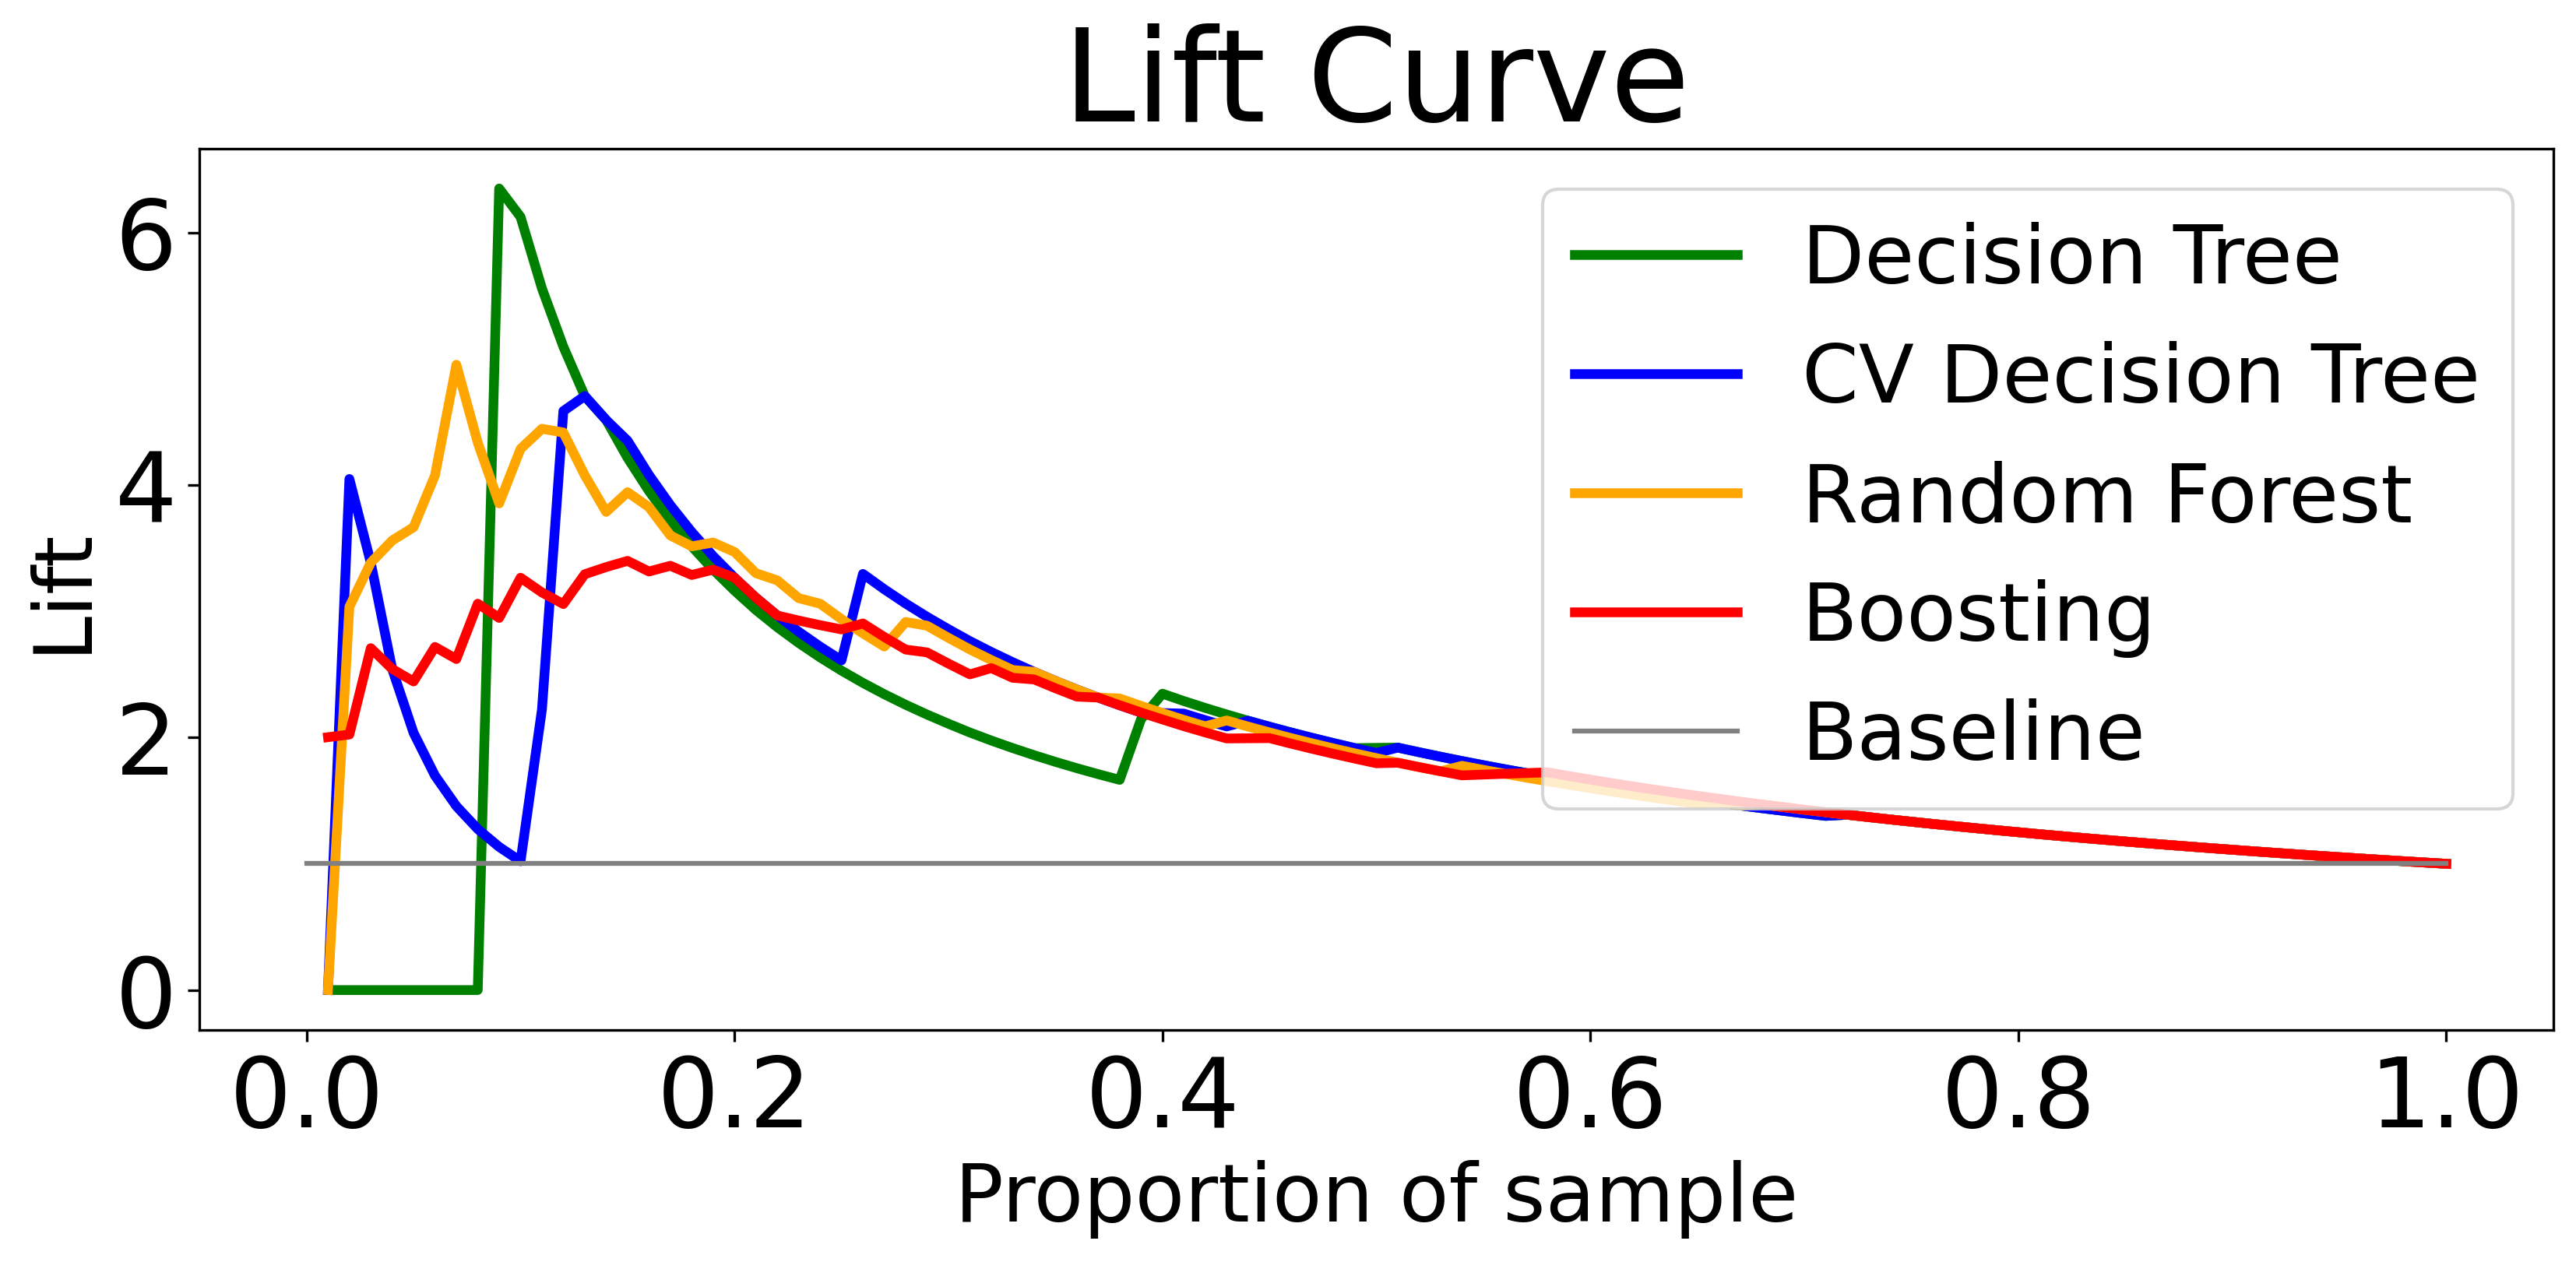

In [744]:
#Plot Lift Curve:
fig, ax = plt.subplots(figsize = (13,5), dpi=300)
ax.plot(lift_Tree["ProportionSample"],lift_Tree["Lift"], color='green', linewidth = 3, label = "Decision Tree")
ax.plot(lift_Tree_CV["ProportionSample"],lift_Tree_CV["Lift"], color='blue', linewidth = 3, label = "CV Decision Tree")
ax.plot(lift_Forest_CV["ProportionSample"],lift_Forest_CV["Lift"], color='orange', linewidth = 3, label = "Random Forest")
ax.plot(lift_Boost_CV["ProportionSample"], lift_Boost_CV["Lift"], color="red", linewidth = 3, label = "Boosting")
ax.plot([0,1],[1,1],color="grey", label="Baseline")
ax.set_xlabel('Proportion of sample')
ax.set_ylabel('Lift')
ax.set_title('Lift Curve')
ax.legend()
plt.show()

### Bei einer Samplesize von 10% hat der Basic Decision Tree mit 6 den höchsten Lift verglichen mit einem zufälligen Classifier. Bei 30% Proportion wiederum wird es von den anderen Modellen überholt. Insgesamt verhalten sich alle Lift curves relativ ähnlich.

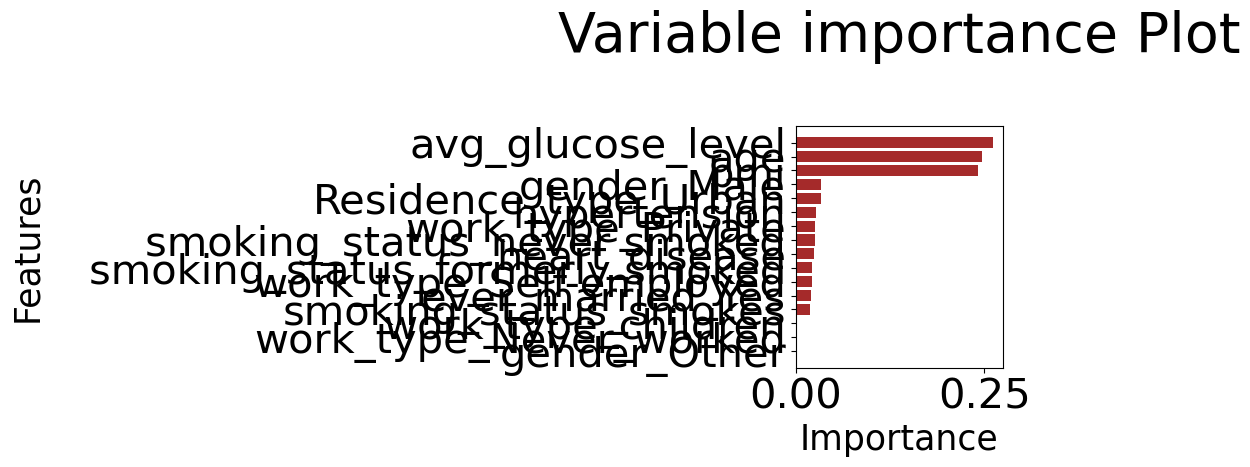

In [745]:
#Plot variable importance:
Random_Forest = RandomForestClassifier(n_estimators = 1000)
Random_Forest.fit(X_train_imputed,y_train)

def plot_variable_importance(model, X_train):
    import matplotlib.pyplot as plt
    from pandas import DataFrame
    imp=DataFrame({"imp":model.feature_importances_, "names":X_train.columns}).sort_values("imp", ascending=True)
    fig, ax = plt.subplots(figsize=(imp.shape[0]/6,imp.shape[0]/5), dpi=100) 
    ax.barh(imp["names"],imp["imp"], color="brown") 
    ax.set_xlabel('Importance')
    ax.set_ylabel('Features\n') 
    ax.set_title('Variable importance Plot\n') 
    plt.show()

plot_variable_importance(Random_Forest, X_train_imputed)

### Die Features "durchschnittlicher Glukosespiegel", "Alter" und "BMI" sind von der grössten Bedeutung für den Random Forest. Das Geschlecht, die Residenz usw. spielen eine untergeordnete Rolle, während "Arbeitstyp Kinder" / "Arbeitstyp Noch nie gearbeitet" und "anderes Geschlecht" hierbei belanglos sind.

Summary of Results:

|Model|Precision [1]|Recall [1]|Accuracy|AUC|
|--|--|--|--|--|
|Basic Tree2|0.02|0.94|0.52|0.73|
|CV Tree2|0.02|0.86|0.62|0.74|
|Random Forest2|0.03|0.84|0.71|0.77|
|Boosted Tree2|0.03|0.78|0.71|0.74|

### Zusammenfassend kann gesagt werden, dass der Random Forest wegen seinem hohen Recall, Accuracy und AUC am besten für unseren Zweck geeignet scheint. Trotzdem ist die Precision von 3% ein Dorn im Auge und impliziert, dass wir 30-mal mehr False Positives als True Positives haben. In anderen Worten: Für 3 Leute mit einem Schlaganfall klassifizieren wir 97 Leute falsch, die eigentlich keinen haben werden. Ob sich das wirklich für eine Versicherung lohnt, müsste man anhand einer spezifischen Profitcurve ausrechnen. Falls man zu viele Leute falsch identifiziert und dadurch höhere Beiträge verlangen müsste oder Kunden strikter selektiert, würde man nämlich auch Kunden respektive Einnahmen verlieren. In Anbetracht der hohen Therapie- und Behandlungskosten im Fall eines Schlaganfalles und der hohen finanziellen Belastung im Todesfall eines Kunden, lässt sich die Precision des Random Forests von 3% rechtfertigen. Gleichwohl hat auch der Boosted Tree Potenzial gezeigt, da er aber einen etwas tieferen Recall aufweist, ist er für unsere Zwecke weniger geeignet. Dies zeigt sehr schön, dass es in diesem Fall nicht ein "bestes Modell" gibt, sondern dass Modelle immer im Kontext betrachtet werden müssen. Zusätzlich deuten die Ergebnisse auf einen Trade-off zwischen Precision und Recall hin, infolgedessen muss man je nach Zweck den Schwerpunkt auch anders setzen.

### Dieser Abschnitt belegt die Bedeutung von ausgeglichenen Datensätzen beim Trainieren von ML Modellen und das Potenzial von Resampling Methoden. Obwohl es vielleicht auf den ersten Blick kontraintuitiv aussieht, muss man das Training Dataset von circa 3600 auf 400 reduzieren, damit man einigermassen brauchbare Resultate erhalten kann. Auch wenn die Grösse des Datasets wichtig ist, ist das Verhältnis der Klassen entscheidend. Ein Training Dataset von 400 Instanzen ist zwar nicht optimal und stellt zweifellos eine Limitation dar, jedoch lässt sich die Brauchbarkeit der Modelle deswegen nicht komplett verleugnen. <br>


## 4) OLS Model

### Nachdem wir schon einigermassen erfolgreiche Resultate mit Decision Trees erzielen konnten, analysieren wir in diesem Abschnitt das lineare Model. Damit wir Statsmodel verwenden können, überprüfen wir als erstes ob alle Features Floats sind.

In [746]:
X_train_imputed.info()  #only floats

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3577 entries, 3160 to 1688
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             3577 non-null   float64
 1   hypertension                    3577 non-null   float64
 2   heart_disease                   3577 non-null   float64
 3   avg_glucose_level               3577 non-null   float64
 4   bmi                             3577 non-null   float64
 5   gender_Male                     3577 non-null   float64
 6   gender_Other                    3577 non-null   float64
 7   ever_married_Yes                3577 non-null   float64
 8   work_type_Never_worked          3577 non-null   float64
 9   work_type_Private               3577 non-null   float64
 10  work_type_Self-employed         3577 non-null   float64
 11  work_type_children              3577 non-null   float64
 12  Residence_type_Urban           

In [747]:
#Import model functions:
import statsmodels.api as sm
import sklearn.linear_model

In [748]:
#Add a constant:
X_train_imputed_lin = sm.add_constant(X_train_imputed)

In [749]:
#Initiate model:
LM1 = sm.OLS(y_train,X_train_imputed_lin)

In [750]:
#Fit model to training data:
results_OLS = LM1.fit()
results_OLS.params  #show parameters

const                            -0.093139
age                               0.003479
hypertension                      0.038498
heart_disease                     0.048203
avg_glucose_level                 0.000218
bmi                              -0.000694
gender_Male                      -0.001896
gender_Other                     -0.022522
ever_married_Yes                 -0.040402
work_type_Never_worked            0.033890
work_type_Private                 0.012420
work_type_Self-employed          -0.017260
work_type_children                0.064126
Residence_type_Urban              0.010060
smoking_status_formerly smoked   -0.002883
smoking_status_never smoked      -0.010469
smoking_status_smokes            -0.006019
dtype: float64

In [751]:
print(results_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                 stroke   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     21.85
Date:                Fri, 20 May 2022   Prob (F-statistic):           2.16e-61
Time:                        16:59:00   Log-Likelihood:                 512.00
No. Observations:                3577   AIC:                            -990.0
Df Residuals:                    3560   BIC:                            -884.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [752]:
#Calculate standardized effects by multiplying with the standard deviation:
standardized_effects_OLS = X_train_imputed_lin.std() * results_OLS.params  
np.exp(standardized_effects_OLS)

const                             1.000000
age                               1.082001
hypertension                      1.011296
heart_disease                     1.010734
avg_glucose_level                 1.009836
bmi                               0.994519
gender_Male                       0.999069
gender_Other                      0.999624
ever_married_Yes                  0.980964
work_type_Never_worked            1.002119
work_type_Private                 1.006167
work_type_Self-employed           0.993666
work_type_children                1.022393
Residence_type_Urban              1.005043
smoking_status_formerly smoked    0.998927
smoking_status_never smoked       0.994963
smoking_status_smokes             0.997826
dtype: float64

In [753]:
#Predict y-values:
y_test_pred_OLS = results_OLS.predict(sm.add_constant(X_test_imputed))
y_train_pred_OLS = results_OLS.predict(sm.add_constant(X_train_imputed))
y_test_pred_OLS.head(10)

2778   -0.011407
4029    0.064178
261     0.005273
1868    0.050600
1028    0.071213
2287    0.130994
2897    0.113195
1134   -0.019011
281     0.154745
1661    0.109244
dtype: float64

In [754]:
#Set an appropriate threshold:
y_test_predclass_OLS = (y_test_pred_OLS > 0.08).astype(int)
y_train_predclass_OLS = (y_train_pred_OLS > 0.08).astype(int)
y_test_predclass_OLS.head(10)

2778    0
4029    0
261     0
1868    0
1028    0
2287    1
2897    1
1134    0
281     1
1661    1
dtype: int64

In [755]:
#Evaluate results:
confusion_matrix(y_test, y_test_predclass_OLS)

array([[1030,  436],
       [   7,   60]])

True Negatives = 1030|
False Positives = 436 |
False Negatives = 7 |
True Positives = 60 

In [756]:
print(classification_report(y_test, y_test_predclass_OLS))

              precision    recall  f1-score   support

           0       0.99      0.70      0.82      1466
           1       0.12      0.90      0.21        67

    accuracy                           0.71      1533
   macro avg       0.56      0.80      0.52      1533
weighted avg       0.96      0.71      0.80      1533



In [757]:
O_train = roc_auc_score(y_train, y_train_predclass_OLS)  #Calculate the area under curve for the training data
O_test = roc_auc_score(y_test, y_test_predclass_OLS) #Calculate the area under curve for the test data
print("AUC of training data is:", O_train, "|", "AUC of testing data is:", O_test)

AUC of training data is: 0.7693327291265435 | AUC of testing data is: 0.7990572376860581


### Das erste Regressions-Modell (OLS) verzeichnet bereits deutlich bessere Werte als der Random Forest Classifier als bisherig bestes Modell. Trotz konstanter Accuracy vermag es sich hinsichtlich der restlichen Kennzahlen deutlich zu steigern. Der AUC-Score von 0.8 ist vielversprechend. Allerdings muss angemerkt werden, dass lediglich 9% der Varianz der Schlanganfälle in den Traingsdaten anhand des OLS-Regressionsmodells erklärt werden können. Des Weiteren fällt auf, dass auch hier die Variable "age" sehr essentiell für die Berechung von Versicherungsprämien ist.

Summary of Results:

|Model|Precision [1]|Recall [1]|Accuracy|AUC|
|--|--|--|--|--|
|Basic Tree2|0.02|0.94|0.52|0.73|
|CV Tree2|0.02|0.86|0.62|0.74|
|Random Forest2|0.03|0.84|0.71|0.77|
|Boosted Tree2|0.03|0.78|0.71|0.74|
|OLS|0.12|0.90|0.71|0.80|

## 5) Logit Regression

In [766]:
#Add a constant and instantiate the logistic regression:
X_train_imputed = sm.add_constant(X_train_imputed)
LM2 = sm.Logit(y_train, X_train_imputed)

In [767]:
#Fit the model and show unstandardized parameters:
results_logit = LM2.fit()
results_logit.params

         Current function value: 0.158565
         Iterations: 35


const                             -7.848497
age                                0.078705
hypertension                       0.387840
heart_disease                      0.252135
avg_glucose_level                  0.002964
bmi                                0.004590
gender_Male                       -0.000524
gender_Other                     -13.920840
ever_married_Yes                  -0.212374
work_type_Never_worked           -18.093735
work_type_Private                  0.090310
work_type_Self-employed           -0.414101
work_type_children                 1.290508
Residence_type_Urban               0.210436
smoking_status_formerly smoked     0.018451
smoking_status_never smoked       -0.222415
smoking_status_smokes              0.058823
dtype: float64

In [768]:
print(results_logit.summary())

                           Logit Regression Results                           
Dep. Variable:                 stroke   No. Observations:                 3577
Model:                          Logit   Df Residuals:                     3560
Method:                           MLE   Df Model:                           16
Date:                Fri, 20 May 2022   Pseudo R-squ.:                  0.2115
Time:                        17:02:58   Log-Likelihood:                -567.19
converged:                      False   LL-Null:                       -719.33
Covariance Type:            nonrobust   LLR p-value:                 3.286e-55
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -7.8485      0.714    -10.995      0.000      -9.248      -6.449
age                                0.0787      0.007     11.505      0.

In [769]:
#Calculate standardized effects by multiplying with the standard deviation:
standardized_effect_logit = X_train_imputed.std() * results_logit.params 
np.exp(standardized_effect_logit)  #extremely high value for "age"

const                             1.000000
age                               5.948691
hypertension                      1.119814
heart_disease                     1.057434
avg_glucose_level                 1.142411
bmi                               1.037007
gender_Male                       0.999742
gender_Other                      0.792345
ever_married_Yes                  0.903909
work_type_Never_worked            0.323064
work_type_Private                 1.045716
work_type_Self-employed           0.858610
work_type_children                1.561549
Residence_type_Urban              1.110968
smoking_status_formerly smoked    1.006895
smoking_status_never smoked       0.898267
smoking_status_smokes             1.021496
dtype: float64

In [770]:
#Predict y-values and set an appropriate threshold:
y_test_pred_logit = results_logit.predict(sm.add_constant(X_test_imputed))
y_train_pred_logit = results_logit.predict(sm.add_constant(X_train_imputed))
y_test_predclass_logit = (y_test_pred_logit > 0.05).astype(int)
y_train_predclass_logit = (y_train_pred_logit > 0.05).astype(int)

In [771]:
#Evaluate results:
print(classification_report(y_test, y_test_predclass_logit))

              precision    recall  f1-score   support

           0       0.99      0.71      0.83      1466
           1       0.12      0.87      0.21        67

    accuracy                           0.72      1533
   macro avg       0.56      0.79      0.52      1533
weighted avg       0.95      0.72      0.80      1533



In [772]:
L_train = roc_auc_score(y_train, y_train_predclass_logit)  #Calculate the area under the curve for the training data
L_test = roc_auc_score(y_test, y_test_predclass_logit)  #Calculate the area under the curve for the test data
print("AUC of training data is:", L_train, "|", "AUC of testing data is:", L_test)

AUC of training data is: 0.7721819417695708 | AUC of testing data is: 0.7875425057522754


### Das logistische Regressionsmodell vermag im Vergleich zu den Decision Trees zu überzeugen. Mit einem Recall-Wert von 0.87 und einer AUC von 0.79 ist es diesbezüglich das zweitbeste Modell. Allerdings verzeichnet das logistische Modell ein höheres Pseudo R2 (angenähertes R2) als das OLS-Modell und kann somit der Varianz der Schlanganfälle erklären. Somit sind beide Modelle insgesamt als ähnlich gut zu klassifizieren.

### Summary of Results:

|Model|Precision [1]|Recall [1]|Accuracy|AUC|(Pseudo) R2
|--|--|--|--|--|--|
|Basic Tree2|0.02|0.94|0.52|0.73|
|CV Tree2|0.02|0.86|0.62|0.74|
|Random Forest2|0.03|0.84|0.71|0.77|
|Boosted Tree2|0.03|0.78|0.71|0.74|
|OLS|0.12|0.90|0.71|0.80|0.09|
|Logistic Regression|0.12|0.87|0.70|0.79|0.21|

## 6) Neural Network

### In diesem Abschnitt versuchen wir noch ein Neural Network Modell mit Keras zu entwickeln. Neural Networks gehören neben Boosted Trees zu den mächtigsten Instrumenten der Data Science. Neural Networks sind konzeptionell etwas anspruchsvoll und orientieren sich in den Grundzügen am menschlichen Gehirn. Da wir sie nicht im Unterricht behandelt haben, werden wir hier etwas stärker auf die Theorie eingehen müssen.

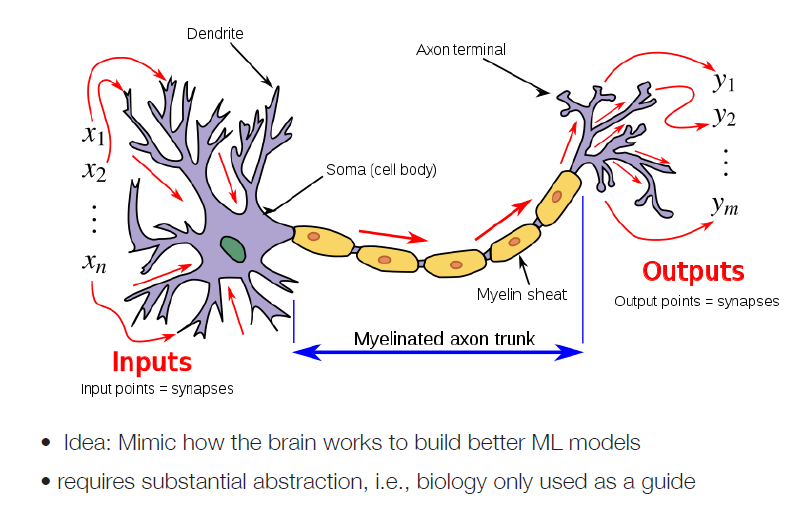

In [272]:
#Import Modules:
#!pip install keras
#!pip install tensorflow
#!pip install ann_visualizer
#!pip install graphviz
#from ann_visualizer.visualize import ann_viz

from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import metrics
from keras.callbacks import EarlyStopping
import tensorflow as tf

### Aufbau eines Neural Networks:

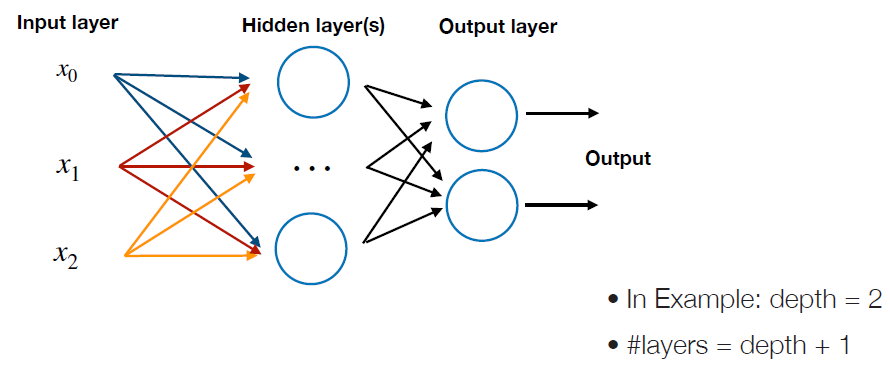

### Neural Networks bestehen aus einer Sammlung von Knoten (artifical neurons), welche durch Synapsen verbunden sind und einen Output produzieren. Zwischen Input und Output kann es verschiedene Layers geben, die unterschiedliche Transformationen auf das Signal vornehmen.

In [273]:
#Merge imputed train and test data from before:
X = pd.concat([X_train_imputed, X_test_imputed], axis=0) #features
y = pd.concat([y_train, y_test], axis=0) #target variable

In [274]:
#Check for NaNs:
X.info(), print("~~"*30), y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 4313 to 3810
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5110 non-null   float64
 1   hypertension                    5110 non-null   float64
 2   heart_disease                   5110 non-null   float64
 3   avg_glucose_level               5110 non-null   float64
 4   bmi                             5110 non-null   float64
 5   gender_Male                     5110 non-null   float64
 6   gender_Other                    5110 non-null   float64
 7   ever_married_Yes                5110 non-null   float64
 8   work_type_Never_worked          5110 non-null   float64
 9   work_type_Private               5110 non-null   float64
 10  work_type_Self-employed         5110 non-null   float64
 11  work_type_children              5110 non-null   float64
 12  Residence_type_Urban           

AttributeError: 'Series' object has no attribute 'info'

In [275]:
#Check dimensions:
X.shape, y.shape

((5110, 16), (5110,))

In [276]:
#Convert X to numpy array:
X = np.array(X)

## 6.1) Neural Network Model 1:

### Wir beginnen mit einem einfachen vier Layer Neural network bestehend aus einem Input Layer, zwei Hidden Layer und ein output layer. Um das Neural Network Modell trainieren zu können, nehmen wir die beiden Activation Funktionen ReLU (Rectified Linear Unit) und Sigmoid.

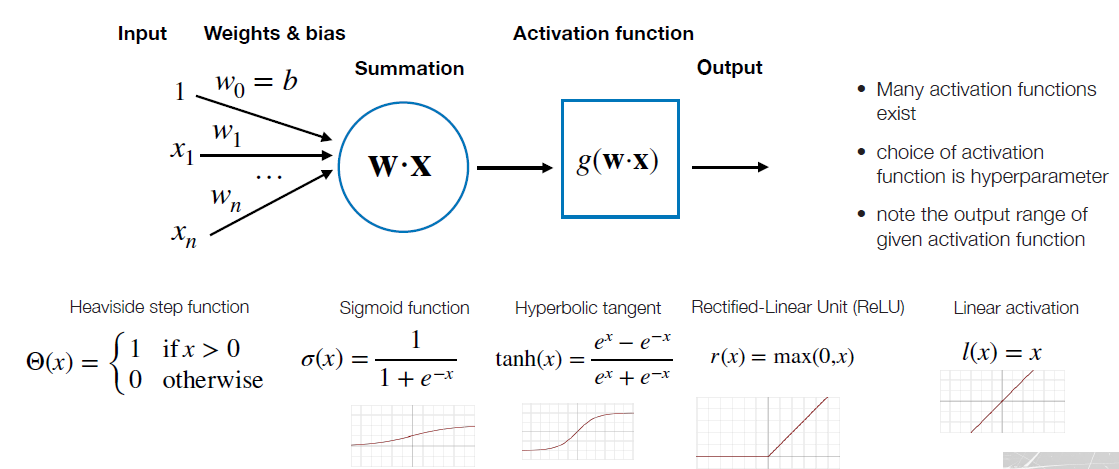

In [277]:
#Build Model:
NNmodel = Sequential()
NNmodel.add(Dense(16, input_shape=(X.shape[1],), activation='relu')) 
NNmodel.add(Dense(16, activation='relu'))
NNmodel.add(Dense(1, activation='sigmoid')) 
NNmodel.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 561
Trainable params: 561
Non-trainable params: 0
_________________________________________________________________


2022-05-19 17:03:44.708128: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [278]:
#ann_viz(NNmodel, title = "Neural Network Model 1")

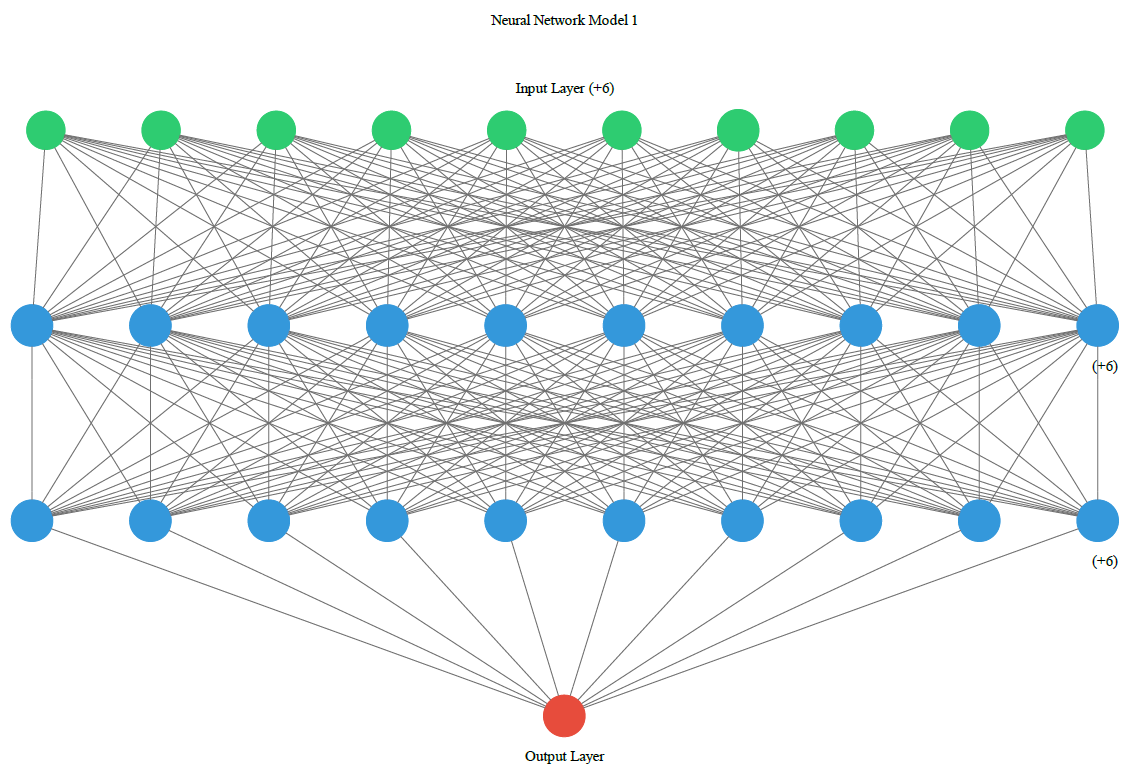

### Da wir mit einem unausgeglichenen Datensatz konfrontiert sind, besteht die Gefahr wie zuvor nur stroke=0 vorauszusagen. Die Schwierigkeit liegt folglich darin ein geeigneter Algorithmus zu finden. Für das erste Modell nehmen wir die Loss Funktion "binary_crossentropy" und den Optimizer "Adam".

In [279]:
#Compile Model:
NNmodel.compile(optimizer='Adam', loss='binary_crossentropy', metrics=[metrics.Recall(),metrics.AUC()]) 

#Adam (Adaptive Moment Estimation) = adaptive learning rate optimization algorithm, sometimes rmsprop or SGD is also used
#binary_crossentropy = loss function we want to optimize

In [280]:
#Define Early Stopping Callbreak:
ESC = EarlyStopping(monitor='recall', patience=10, restore_best_weights=True) #we want to optimize for recall

In [281]:
#Make Results More Reproducible:
from keras import backend as K
import random as rn
import os
os.environ["PYTHONHASHSEED"] = '0'
np.random.seed(1), tf.random.set_seed(2), rn.seed(3)

gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.333)
cfg = tf.compat.v1.ConfigProto(gpu_options=gpu_options)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=cfg)
K.set_session(sess)
#beware deviations may occur

In [282]:
NNhistory = NNmodel.fit(X,y,callbacks=[ESC], epochs=1000, batch_size=32, 
                    validation_split=0.2, shuffle=True, verbose=1)

Epoch 1/1000
128/128 [==============================] - 2s 8ms/step - loss: 0.2626 - recall: 0.0546 - auc: 0.5535 - val_loss: 0.2413 - val_recall: 0.0000e+00 - val_auc: 0.6254
Epoch 2/1000
128/128 [==============================] - 0s 2ms/step - loss: 0.1773 - recall: 0.0000e+00 - auc: 0.6975 - val_loss: 0.2396 - val_recall: 0.0000e+00 - val_auc: 0.6946
Epoch 3/1000
128/128 [==============================] - 0s 2ms/step - loss: 0.1750 - recall: 0.0000e+00 - auc: 0.7154 - val_loss: 0.2328 - val_recall: 0.0000e+00 - val_auc: 0.7086
Epoch 4/1000
128/128 [==============================] - 0s 3ms/step - loss: 0.1740 - recall: 0.0055 - auc: 0.7252 - val_loss: 0.2372 - val_recall: 0.0000e+00 - val_auc: 0.7134
Epoch 5/1000
128/128 [==============================] - 0s 3ms/step - loss: 0.1734 - recall: 0.0055 - auc: 0.7312 - val_loss: 0.2323 - val_recall: 0.0000e+00 - val_auc: 0.7215
Epoch 6/1000
128/128 [==============================] - 0s 4ms/step - loss: 0.1724 - recall: 0.0000e+00 - auc: 0

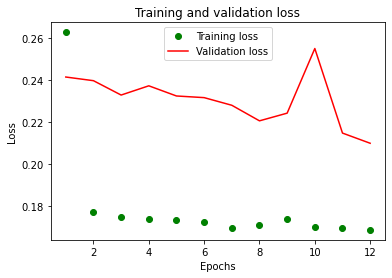

In [283]:
#Evaluate Model with Learning Curve Loss:
NNhistory_dict = NNhistory.history
loss_values = NNhistory_dict['loss']
val_loss_values = NNhistory_dict['val_loss']
epochs = range(1, len(loss_values) + 1) 

#Plot:
plt.plot(epochs, loss_values, 'go', label='Training loss')
plt.plot(epochs, val_loss_values, 'red', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

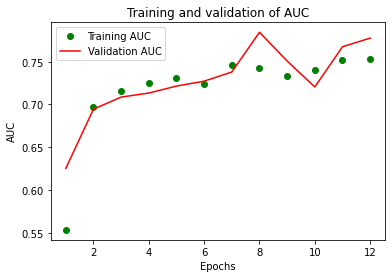

In [284]:
#Evaluate Model with Learning Curve AUC:
NNhistory_dict = NNhistory.history
loss_values = NNhistory_dict['auc']
val_loss_values = NNhistory_dict['val_auc']
epochs = range(1, len(loss_values) + 1) 

#Plot:
plt.plot(epochs, loss_values, 'go', label='Training AUC')
plt.plot(epochs, val_loss_values, 'red', label='Validation AUC')
plt.title('Training and validation of AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.show()

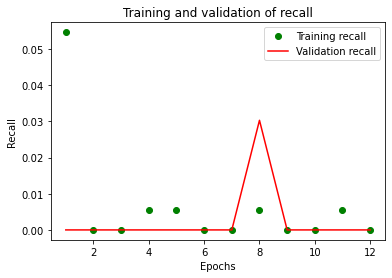

In [285]:
#Evaluate Model with Learning Curve Loss:
NNhistory_dict = NNhistory.history
loss_values = NNhistory_dict['recall']
val_loss_values = NNhistory_dict['val_recall']
epochs = range(1, len(loss_values) + 1) 

#Plot:
plt.plot(epochs, loss_values, 'go', label='Training recall')
plt.plot(epochs, val_loss_values, 'red', label='Validation recall')
plt.title('Training and validation of recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.show()

### Das Modell tut sich schwer im Optimieren des Recalls.

In [286]:
#Evaluate Model with Confusion Matrix:
NNmodel.predict(X)
np.round(NNmodel.predict(X),0) # (1 = stroke, 0 = no stroke)

#Confusion Matrix (TN, FP, FN, TP):
preds = np.round(NNmodel.predict(X),0)
print(confusion_matrix(y, preds))

160/160 [==============================] - 0s 973us/step
[[4861    0]
 [ 249    0]]


In [287]:
print(classification_report(y, preds))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      4861
           1       0.00      0.00      0.00       249

    accuracy                           0.95      5110
   macro avg       0.48      0.50      0.49      5110
weighted avg       0.90      0.95      0.93      5110



### Keine von den 249 Strokes werden richtig als stroke=1 klassifiziert. Das heisst wir haben das gleiche Problem wie in Abschnitt 3.1, denn das Modell sagt praktisch nur stroke=0 voraus, was zu einem Recall von 0 führt. Wir wollen jedoch für die Versicherung den Recall und nicht die Precision oder Accuracy optimieren! Zuvor konnten wir das Problem mit einer Resampling Methode lösen, jedoch braucht ein Neural Network deutlich mehr als 400 Instanzen in der Trainingsphase, weshalb Resampling hier nicht in Frage kommt. Allerdings erhält Valova et al. (2020) im Kontext von unausgeglichenen Datensätzen deutlich bessere Resultate, indem sie eine Augmentation Technique benutzen, um ihr Datensatz von 1460 auf 3852 Instanzen zu erhöhen (pp.665-669).  Im nächsten Abschnitt gehen wir zurück auf das resampelte Dataset und vergrössern die Anzahl Instanzen mit einem Augmentationsverfahren. <br>

## 6.2) Neural Network Model 2:

### Augmentation:

In [288]:
#Take earlier used dataset only consisting of stroke=1:
df1.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,NaN,1,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0


In [289]:
df0.shape #Remember there are 4861 Instances in dataset only consisting of stroke=0

(4861, 17)

In [290]:
#Value Imputation A:
cols = list(df1.columns)
imputer = KNNImputer(n_neighbors=5)
imputer.fit(df1)
df1A = imputer.transform(df1)
df1A = pd.DataFrame(df1A, columns=cols, index = df1.index)
df1A["bmi"].isnull().mean()  #all Missing Values were imputed

0.0

In [291]:
#Value Imputation B:
cols = list(df0.columns)
imputer = KNNImputer(n_neighbors=5)
imputer.fit(df0)
df0A = imputer.transform(df0)
df0A = pd.DataFrame(df0A, columns=cols, index = df0.index)
df0A["bmi"].isnull().mean()  #all Missing Values were imputed

0.0

### Eine Augmentation ist relativ aufwändig aber das Konzept dahinter ist unkompliziert. Zuerst müssen wir die Attributes aus dem Datensatz definieren bevor wir die Standardabweichung ausrechnen.

In [292]:
#Define each attribute:
age = df1A["age"]
hyp = df1A["hypertension"]
heart = df1A["heart_disease"]
glu = df1A["avg_glucose_level"]
bmi = df1A["bmi"]
male = df1A["gender_Male"]
other = df1A["gender_Other"]
married = df1A["ever_married_Yes"]
nwork = df1A["work_type_Never_worked"]
privateemp = df1A["work_type_Private"]
selfemp = df1A["work_type_Self-employed"]
childemp = df1A["work_type_children"]
urban = df1A["Residence_type_Urban"]
formerlyS = df1A["smoking_status_formerly smoked"]
neverS = df1A["smoking_status_never smoked"]
smokeS = df1A["smoking_status_smokes"]
stroke = df1A["stroke"]

In [293]:
#Define attribute with standard deviation:
ages = np.std(age)
hyps = np.std(hyp)
hearts = np.std(heart)
glus = np.std(glu)
bmis = np.std(bmi)
males = np.std(male)
others = np.std(other)
marrieds = np.std(married)
nworks = np.std(nwork)
privateemps = np.std(privateemp)
selfemps = np.std(selfemp)
childemps = np.std(childemp)
urbans = np.std(urban)
formerlySs = np.std(formerlyS)
neverSs = np.std(neverS)
smokeSs = np.std(smokeS)
strokes = stroke #We want to keep the target variable the same 

In [297]:
augmented_df = [] #empty list

### Unser Ziel ist es ein Datensatz mit crica 4900 Instanzen zu erstellen ( d.h. (4861-249)/249 = 18.52). Dafür kann man den folgenden for loop benutzen: 

In [298]:
for x in range(19): #only run once!
    for x, row in df1A.iterrows():
        t = {
            "age": row["age"] + np.random.uniform(ages),
            "hypertension": row["hypertension"] + np.random.uniform(hyps),
            "heart_disease": row["heart_disease"] + np.random.uniform(hearts),
            "avg_glucose_level": row["avg_glucose_level"] + np.random.uniform(glus),
            "bmi": row["bmi"] + np.random.uniform(bmis),
            "gender_Male": row["gender_Male"] + np.random.uniform(males),
            "gender_Other": row["gender_Other"] + np.random.uniform(others),
            "ever_married_Yes": row["ever_married_Yes"] + np.random.uniform(marrieds),
            "work_type_Never_worked": row["work_type_Never_worked"] + np.random.uniform(nworks),
            "work_type_Private": row["work_type_Private"] + np.random.uniform(privateemps),
            "work_type_Self-employed": row["work_type_Self-employed"] + np.random.uniform(selfemps),
            "work_type_children": row["work_type_children"] + np.random.uniform(childemps),
            "Residence_type_Urban": row["Residence_type_Urban"] + np.random.uniform(urbans),
            "smoking_status_formerly smoked": row["smoking_status_formerly smoked"] + np.random.uniform(formerlySs),
            "smoking_status_never smoked": row["smoking_status_never smoked"] + np.random.uniform(neverSs),
            "smoking_status_smokes": row["smoking_status_smokes"] + np.random.uniform(smokeSs),
            "stroke": row["stroke"],
        }
        augmented_df.append(t)
print(len(augmented_df), "entries were synthetically created") 
#19*249 (new data) + 249 (orginial data) a bit more than 4861 but this might even help us to optimise recall

4731 entries were synthetically created


In [300]:
#Covert to dataframe:
augmented_df = pd.DataFrame (augmented_df, columns = list(df1.columns))
type(augmented_df)

pandas.core.frame.DataFrame

In [301]:
augmented_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4731 entries, 0 to 4730
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             4731 non-null   float64
 1   hypertension                    4731 non-null   float64
 2   heart_disease                   4731 non-null   float64
 3   avg_glucose_level               4731 non-null   float64
 4   bmi                             4731 non-null   float64
 5   stroke                          4731 non-null   float64
 6   gender_Male                     4731 non-null   float64
 7   gender_Other                    4731 non-null   float64
 8   ever_married_Yes                4731 non-null   float64
 9   work_type_Never_worked          4731 non-null   float64
 10  work_type_Private               4731 non-null   float64
 11  work_type_Self-employed         4731 non-null   float64
 12  work_type_children              47

In [302]:
#Merge Synthetic Dataset With Real Dataset:
augmented_df = pd.concat([augmented_df, df1A], axis=0)
augmented_df #4980 entries

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,72.819336,0.739989,1.945396,279.364913,41.091282,1.0,1.709193,0.600505,1.620420,0.316491,1.945754,0.970584,0.642383,1.826309,1.969024,0.532057,0.833750
1,68.658318,0.456280,0.611904,260.412010,41.159444,1.0,0.612653,0.046411,1.399694,0.667818,0.749152,1.942250,0.229617,0.543815,0.959869,1.799029,0.778878
2,84.098122,0.966094,1.667290,145.201030,33.551518,1.0,1.846852,0.825838,1.679786,0.980410,1.966007,0.494775,0.607049,0.663822,0.486699,1.661545,0.452657
3,55.271684,0.798677,0.814259,179.587608,36.459966,1.0,0.925945,0.953365,1.559392,0.374476,1.866003,0.672944,0.906528,1.602003,0.479198,0.738927,1.582949
4,84.212106,1.865059,0.610036,219.383019,28.180502,1.0,0.805516,0.763560,1.589219,0.693352,0.876237,1.595537,0.347782,0.675523,0.762336,1.754496,0.433585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,57.000000,0.000000,0.000000,84.960000,36.700000,1.0,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
245,14.000000,0.000000,0.000000,57.930000,30.900000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
246,75.000000,0.000000,0.000000,78.800000,29.300000,1.0,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
247,71.000000,1.000000,0.000000,87.800000,29.960000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [303]:
#Merge Augmented_df with df0:
stroke_augmented_df = pd.concat([augmented_df, df0A], axis=0)
stroke_augmented_df.info() #9841 entries

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9841 entries, 0 to 5109
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             9841 non-null   float64
 1   hypertension                    9841 non-null   float64
 2   heart_disease                   9841 non-null   float64
 3   avg_glucose_level               9841 non-null   float64
 4   bmi                             9841 non-null   float64
 5   stroke                          9841 non-null   float64
 6   gender_Male                     9841 non-null   float64
 7   gender_Other                    9841 non-null   float64
 8   ever_married_Yes                9841 non-null   float64
 9   work_type_Never_worked          9841 non-null   float64
 10  work_type_Private               9841 non-null   float64
 11  work_type_Self-employed         9841 non-null   float64
 12  work_type_children              98

### Die Augmentation scheint gut funktioniert zu haben. Wir können nun mit dem neuen Datensatz ein hoffentlich besseres Neural Network trainieren! Natürlich ist es etwas problematisch, dass 48% der Daten synthetisch sind, jedoch ist es ein mehr oder weniger bewährtes Verfahren, welches sich in Anbetracht der Umstände anbietet. Zuerst werden wir den neuen Datensatz in 70% Trainings- und 30% Testdaten splitten.

In [304]:
#Define Training and Testing Data:
X_new = stroke_augmented_df.drop("stroke", axis = 1)
y_new = stroke_augmented_df["stroke"]

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, train_size = 0.7, random_state=1)
X_train_new.shape, X_test_new.shape

((6888, 16), (2953, 16))

In [305]:
#Model Creation:
from keras import Sequential
from keras.layers import Flatten, Dense, Dropout

NNmodel_new = Sequential([Flatten(input_shape=(X.shape[1],)),
                                Dense(12, activation="sigmoid"),
                                Dropout(0.2, seed=0), #usually a small value between 0.2-0.5
                                Dense(16, activation="relu"),
                                Dense(16, activation="softmax"),
                                Dense(1, activation="sigmoid")]) #in the end either 0 or 1
NNmodel_new.summary() 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 12)                204       
                                                                 
 dropout (Dropout)           (None, 12)                0         
                                                                 
 dense_4 (Dense)             (None, 16)                208       
                                                                 
 dense_5 (Dense)             (None, 16)                272       
                                                                 
 dense_6 (Dense)             (None, 1)                 17        
                                                                 
Total params: 701
Trainable params: 701
Non-trainable 

In [134]:
#Input layer is a Flatten layer which cannot be visualized easily
#ann_viz(NNmodel_new, title = "Neural Network Model 2") 

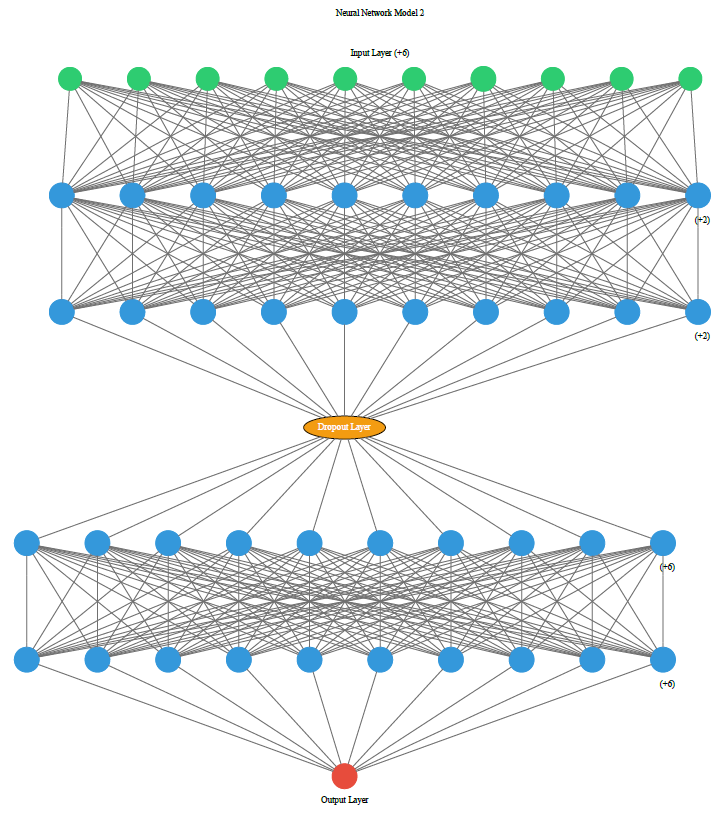

In [306]:
#Compilation:
NNmodel_new.compile(optimizer='adam', loss='binary_crossentropy', 
    metrics=[metrics.Recall(),metrics.AUC(),"accuracy"])

In [307]:
#Define Early Stopping Callbreak:
ESC2 = EarlyStopping(monitor= 'recall_1',mode="max", patience=16, 
        restore_best_weights=True) #we want to optimize for recall

In [308]:
#Fitting:
NNhistory2 = NNmodel_new.fit(X_train_new, y_train_new, callbacks=ESC2, epochs=1000, batch_size=32)

Epoch 1/1000
216/216 [==============================] - 1s 2ms/step - loss: 0.6752 - recall_1: 0.8684 - auc_1: 0.6909 - accuracy: 0.6400
Epoch 2/1000
216/216 [==============================] - 1s 3ms/step - loss: 0.5335 - recall_1: 0.8902 - auc_1: 0.8815 - accuracy: 0.8268
Epoch 3/1000
216/216 [==============================] - 0s 2ms/step - loss: 0.4161 - recall_1: 0.9266 - auc_1: 0.9337 - accuracy: 0.8998
Epoch 4/1000
216/216 [==============================] - 0s 2ms/step - loss: 0.3410 - recall_1: 0.9329 - auc_1: 0.9547 - accuracy: 0.9264
Epoch 5/1000
216/216 [==============================] - 1s 3ms/step - loss: 0.3010 - recall_1: 0.9406 - auc_1: 0.9520 - accuracy: 0.9354
Epoch 6/1000
216/216 [==============================] - 1s 3ms/step - loss: 0.2586 - recall_1: 0.9447 - auc_1: 0.9573 - accuracy: 0.9506
Epoch 7/1000
216/216 [==============================] - 0s 2ms/step - loss: 0.2420 - recall_1: 0.9472 - auc_1: 0.9563 - accuracy: 0.9496
Epoch 8/1000
216/216 [===================

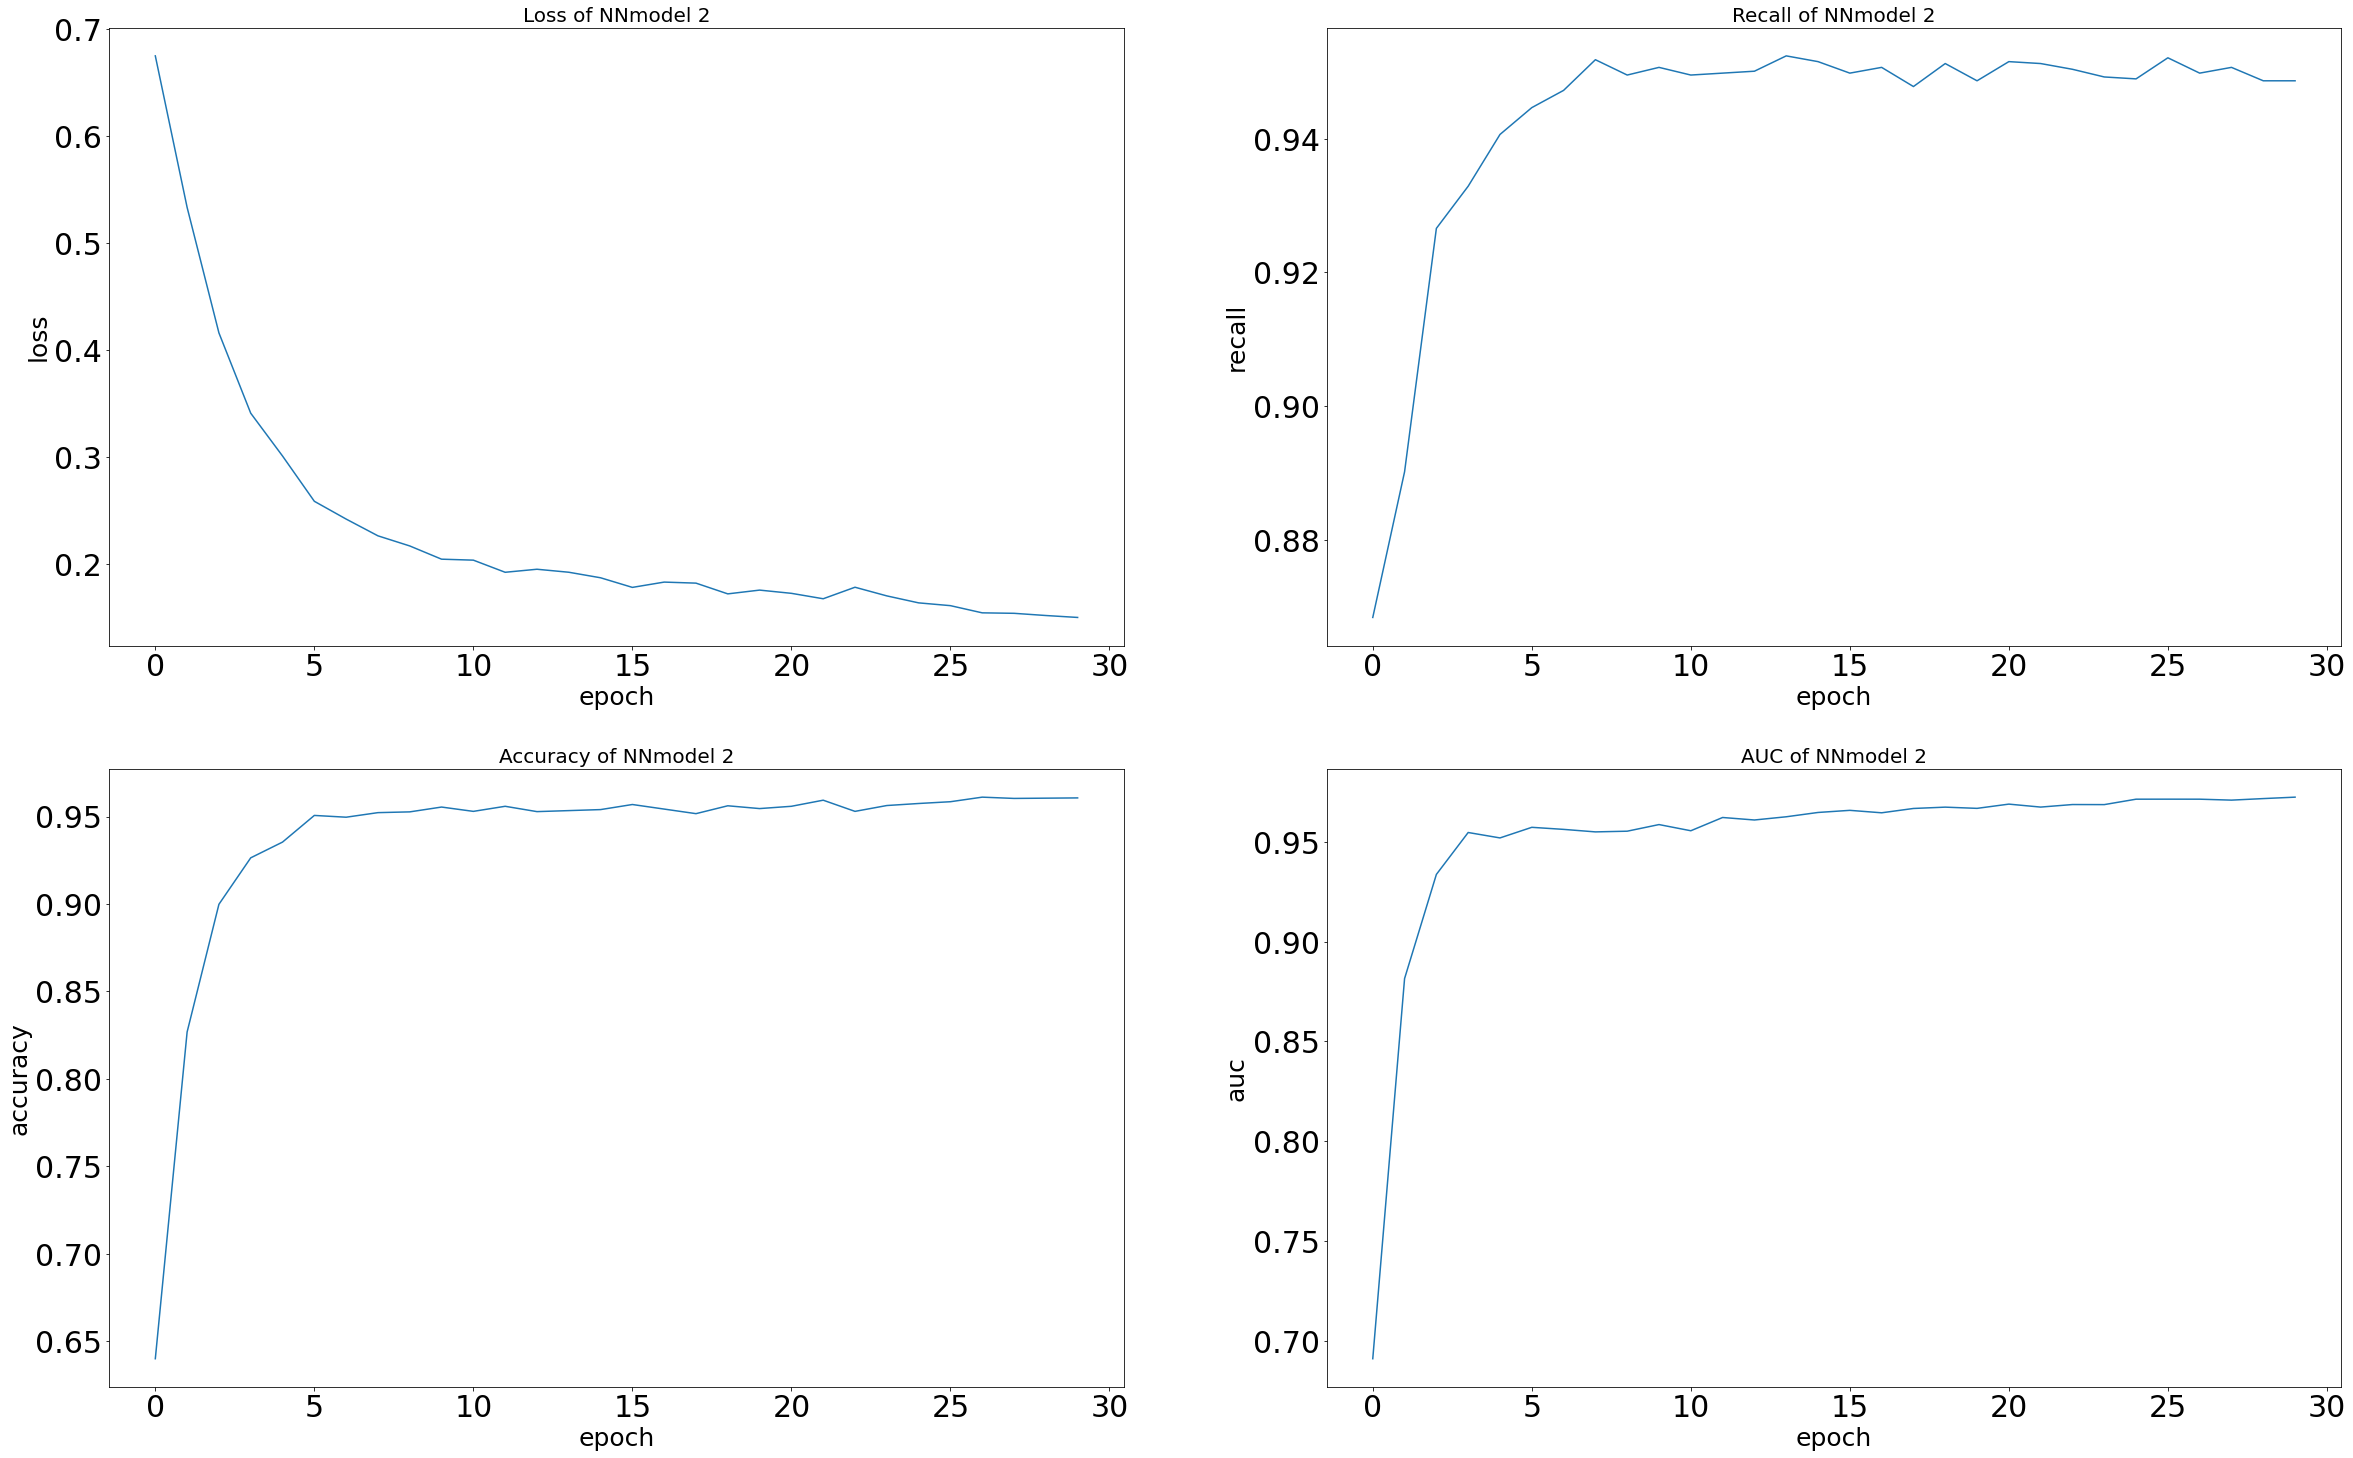

In [312]:
#Plot History:
fig, axs= plt.subplots(2,2, figsize=(40, 25))
axs[0,0].plot(NNhistory2.history["loss"])
axs[0,0].set_title("Loss of NNmodel 2")
axs[0,0].set_ylabel("loss")
axs[0,0].set_xlabel("epoch")

axs[0,1].plot(NNhistory2.history["recall_1"])
axs[0,1].set_title("Recall of NNmodel 2")
axs[0,1].set_ylabel("recall")
axs[0,1].set_xlabel("epoch")

axs[1,0].plot(NNhistory2.history["accuracy"])
axs[1,0].set_title("Accuracy of NNmodel 2")
axs[1,0].set_ylabel("accuracy")
axs[1,0].set_xlabel("epoch")
                 
axs[1,1].plot(NNhistory2.history["auc_1"])
axs[1,1].set_title("AUC of NNmodel 2")
axs[1,1].set_ylabel("auc")
axs[1,1].set_xlabel("epoch")

plt.rc('font',size=25)
plt.rc('axes',titlesize=40)
plt.rc('ytick',labelsize=30)
plt.rc('xtick',labelsize=30)

plt.show()

### Training Data:

In [313]:
#Confusion Matrix (TN, FP, FN, TP):
preds2 = np.round(NNmodel_new.predict(X_train_new),0)
print(confusion_matrix(y_train_new, preds2))

216/216 [==============================] - 0s 1ms/step
[[3400    1]
 [ 175 3312]]


In [315]:
print(classification_report(y_train_new, preds2))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      3401
         1.0       1.00      0.95      0.97      3487

    accuracy                           0.97      6888
   macro avg       0.98      0.97      0.97      6888
weighted avg       0.98      0.97      0.97      6888



In [316]:
#More precise:
scores = NNmodel_new.evaluate(X_train_new, y_train_new)
print("%s: %.2f%%" % (NNmodel_new.metrics_names[1], scores[1]*100))

216/216 [==============================] - 1s 1ms/step - loss: 0.1381 - recall_1: 0.9498 - auc_1: 0.9753 - accuracy: 0.9744
recall_1: 94.98%


### Testing Data:

In [317]:
#Confusion Matrix (TN, FP, FN, TP):
preds3 = np.round(NNmodel_new.predict(X_test_new),0)
print(confusion_matrix(y_test_new, preds3))

93/93 [==============================] - 0s 951us/step
[[1458    2]
 [  74 1419]]


In [318]:
print(classification_report(y_test_new, preds3))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      1460
         1.0       1.00      0.95      0.97      1493

    accuracy                           0.97      2953
   macro avg       0.98      0.97      0.97      2953
weighted avg       0.98      0.97      0.97      2953



In [319]:
#More precise:
scores = NNmodel_new.evaluate(X_test_new, y_test_new)
print("%s: %.2f%%" % (NNmodel_new.metrics_names[1], scores[1]*100))

93/93 [==============================] - 0s 2ms/step - loss: 0.1376 - recall_1: 0.9504 - auc_1: 0.9756 - accuracy: 0.9743
recall_1: 95.04%


### Das zweite Neural Network zeichnet sich durch sehr starke Metriken aus und weist nicht nur hohen Recall, sondern auch hohen AUC, Accuracy und Precision auf. Jedoch muss man sich überlegen, ob man dieses Modell wirklich in einem Real Life Business implementieren will, da es auf 48% synthetischen Daten basiert. Um die Qualität des  zweiten Neural Network noch etwas besser zu belegen, wenden wir es zum Schluss noch auf die Testdaten des ursprünglichen Datensatzes an.

In [320]:
#Check with previous dataset:
NNmodel_new.predict(X_test_imputed)

48/48 [==============================] - 0s 897us/step


array([[0.07561727],
       [0.07561733],
       [0.07563143],
       ...,
       [0.07561751],
       [0.0756173 ],
       [0.07561733]], dtype=float32)

In [321]:
#round as binary classification:
score = np.round(NNmodel_new.predict(X_test_imputed),0)
score #problematic as threshold of 0.5 too high

48/48 [==============================] - 0s 2ms/step


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

### Zuvor konnten wir sehen, dass ein Stärke der OLS und GLM Modell das Threshold Setting ist. Bei Neural Network Predictions kann man dies auch machen. Leider ist das Modell nicht vollständig reproduzierbar, deshalb erhalten wir jedes Mal etwas verschiedene Werte. Um einen Default Threshold zu definieren müssen wir folglich den Datensatz normalisieren.

In [323]:
#Apply Model on Dataset:
arrlst = NNmodel_new.predict(X_test_imputed).tolist() #dataset we want to check

#Calculate min and max:
min1 = arrlst[0]
for i in range(len(arrlst)):
    if arrlst[i] < min1:
        min1 = arrlst[i]
        

max1 = arrlst[0]
for i in range(len(arrlst)):
    if arrlst[i] > max1:
        max1 = arrlst[i]

        
a = np.asarray(min1).view()
min1= a.item() 
a = np.asarray(max1).view()
max1= a.item() 

print(min1)
print(max1)

48/48 [==============================] - 0s 879us/step
0.0756172314286232
0.2896271347999573


In [324]:
#Normalize array:
arrlst = np.array(arrlst)
norm = np.linalg.norm(arrlst)
norm_arr = arrlst/norm
norm_arr

array([[0.0253219 ],
       [0.02532192],
       [0.02532664],
       ...,
       [0.02532198],
       [0.02532191],
       [0.02532192]])

In [325]:
df_describe = pd.DataFrame(norm_arr)
df_describe.describe()

,0
count,1533.000000
mean,0.025454
std,0.002097
min,0.025322
25%,0.025322
50%,0.025322
75%,0.025324
max,0.096987


### Als Threshold wird das arithmetische Mittel genommen minus ein Fehlerterm von 5-6% STD, welcher experimentell ermittelt wurde. Da man je nach Modell unterschiedliche Werte hat, darf der Fehlerterm keine absolute Zahl sein! Einen kleinen Prozentsatz der Standardabweichung bietet sich hier z.B. an.


In [326]:
#threshold rounding:
threshold= np.mean(norm_arr)-0.055*np.std(norm_arr)  #mean is sufficient but futher lowering the threshold prevents FNs
score = np.where(norm_arr > threshold, 1, 0)

for x in range (0,30):
    print(score[x]) #predicts 3 strokes

[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


In [327]:
y_test.head(30) #2 were predicted correctly, 1 False Positive

4673    0
3232    0
3694    0
1070    0
4163    0
795     0
440     0
870     0
1102    0
836     0
4236    0
574     0
3244    0
4       1
3007    0
4490    0
4969    0
3510    0
718     0
3689    0
1169    0
28      1
1958    0
3875    0
4350    0
2304    0
2933    0
325     0
3484    0
4925    0
Name: stroke, dtype: int64

In [332]:
a = NNmodel_new.evaluate(X_test_imputed, y_test)


48/48 [==============================] - 0s 1ms/step - loss: 0.2137 - recall_1: 0.0000e+00 - auc_1: 0.5143 - accuracy: 0.9459


### Dies könnte natürlich auch ein Zufall sein weshalb noch ein anderes Sample herangezogen werden muss. Es ist wichtig den Threshold tief anzusetzen auch wenn wir einige False Positives bekommen stört uns das viel weniger als False Negatives.

In [329]:
#Try again with other sample:
for x in range (1503,1533,1):
    print(score[x]) #predicts 2 stroke

[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]


In [330]:
y_test.tail(30) #1 stroke was predicted correctly, 1FP

3809    0
2402    0
773     0
2123    0
4546    0
3157    0
5106    0
4962    0
201     1
3998    0
4187    0
1476    0
4536    0
3397    0
1926    0
416     0
3068    0
4968    0
4498    0
4482    0
4304    0
5070    0
1520    0
338     0
260     0
3206    0
719     0
2881    0
568     0
3810    0
Name: stroke, dtype: int64

###  Nach dem Test mit den 2 Samples kann der Durchschnitt minus 5 bis 6% der Standardabweichung als geeignet erklärt werden, jedoch gibt es natürlich noch bessere Thresholds. Um diese zu finden, könnte man noch mehr Samples heranziehen und eine Threshold Optimization durchführen. Abschliessend gesagt, haben Neural Networks mit Deep Learning und Augmentation viel Potenzial um solche binary Classification Problems mit imbalanced Datasets zu lösen.  <br>

# 7) Conclusion:

### Ein Highlight dieses Projektes ist es das Problem mit unausgeglichenen Datensätzen zu beleuchten und im Kontext von Decision Trees mit Resampling und im Kontext von Neural Networks mit Augmentation zu lösen. Wir sind uns bewusst, dass nicht alle Verfahren und Entscheidungen in diesem Paper optimal waren, jedoch waren Wir stets bemüht möglichst objektiv und akademisch vorzugehen. 
### (noch nicht fertig) 

## 8) Anhang

https://www.ahajournals.org/doi/10.1161/STR.0b013e318296aeca

https://pubmed.ncbi.nlm.nih.gov/35078371/

https://www.swissneuro.ch/schlaganfall

https://journals.sagepub.com/doi/full/10.1177/17474930211019568

https://pubmed.ncbi.nlm.nih.gov/16574918/

https://www.researchgate.net/publication/263913891_Classification_of_imbalanced_data_a_review

https://www.sciencedirect.com/science/article/pii/S1877050920319335